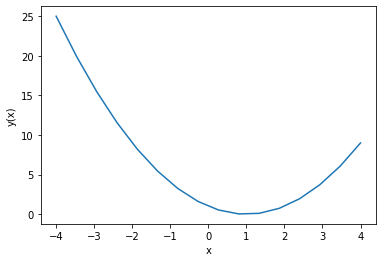

In [ ]:
# plt測試
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
x = np.linspace(-4.0, 4.0, 16)

f = np.poly1d(np.array([1, -2, 1]).astype(float),variable='x')
g = np.poly1d(np.array([1,0]).astype(float),variable='x')
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

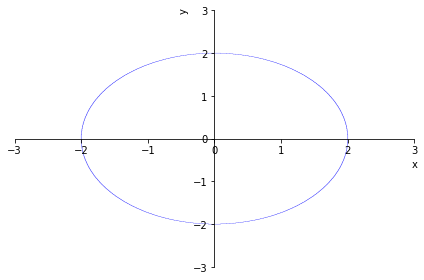

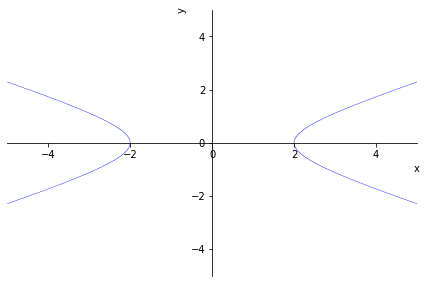

In [30]:

from sympy import *
# implicit function
x, y = symbols('x y')
#建立：橢圓函數：x**2+y**2 = 4
plot_implicit(Eq(x**2 + y**2,4),(x,-3,3),(y,-3,3))

#建立：雙曲線函數:x**2/4-y**2 =1
plot_implicit(Eq(x**2/4-y**2, 1))

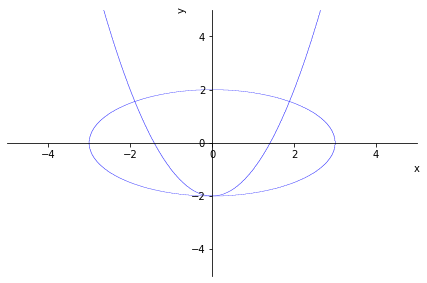

解二元一次聯立方程式= [(0, -2), (0, -2), (-4*sqrt(2)/3, 14/9), (4*sqrt(2)/3, 14/9)]


In [35]:
# sympy測試
from sympy import *
x, y = symbols('x y')
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,show=False)
p1.extend(p2) # p2和p1畫在一起
p1.show()
# 求解兩條線的交叉點(solve(f1,f2))
print('解二元一次聯立方程式=', solve((f,g),(x,y)))

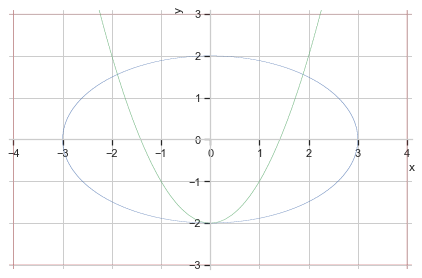

In [89]:
from sympy import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")
#sns.set_style("whitegrid", {'grid.linestyle': '-'})
#sns.set_style("whitegrid", {'grid.ticks':0.5})

x, y = symbols('x y')
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,(x,-4.1, 4.1),(y,-3.1, 3.1),show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,(x,-4.1, 4.1),(y,-3.1, 3.1),show=False)

# 邊界
le=Eq(x,-4)# left:x=-4
ri=Eq(x,4)# right:x=4
up=Eq(y,3)# up
dw=Eq(y,-3)# down
l1=plot_implicit(le,(x,-4.1, 4.1),(y,-3.1, 3.1),show=False)
l2=plot_implicit(ri,(x,-4.1, 4.1),(y,-3.1, 3.1),show=False)
l3=plot_implicit(up,(x,-4.1, 4.1),(y,-3.1, 3.1),show=False)
l4=plot_implicit(dw,(x,-4.1, 4.1),(y,-3.1, 3.1),show=False)

# set line color
p1[0].line_color = 'b'
p2[0].line_color = 'g'
l1[0].line_color = 'r'
l2[0].line_color = 'r'
l3[0].line_color = 'r'
l4[0].line_color = 'r'

p1.extend(p2)
p1.extend(l1)
p1.extend(l2)
p1.extend(l3)
p1.extend(l4)

p1.show()

In [14]:
# 繪製圖形
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
from ast import literal_eval
import random

plt.rcParams['figure.figsize'] = 20,22 # 更改圖片大小

def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]


x, y = symbols('x y')
rangex=(x,-5, 5)
rangey=(y,-3.5, 7.5)
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,rangex,rangey,show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,rangex,rangey,show=False)

# 邊界
le=Eq(x,-4)# left:x=-4
ri=Eq(x,4)# right:x=4
up=Eq(y,3)# up
dw=Eq(y,-3)# down
l1=plot_implicit(le,rangex,rangey,show=False)
l2=plot_implicit(ri,rangex,rangey,show=False)
l3=plot_implicit(up,rangex,rangey,show=False)
l4=plot_implicit(dw,rangex,rangey,show=False)

# set line color
p1[0].line_color = 'b'
p2[0].line_color = 'g'
l1[0].line_color = 'r'
l2[0].line_color = 'r'
l3[0].line_color = 'r'
l4[0].line_color = 'r'

p1.extend(p2)
p1.extend(l1)
p1.extend(l2)
p1.extend(l3)
p1.extend(l4)

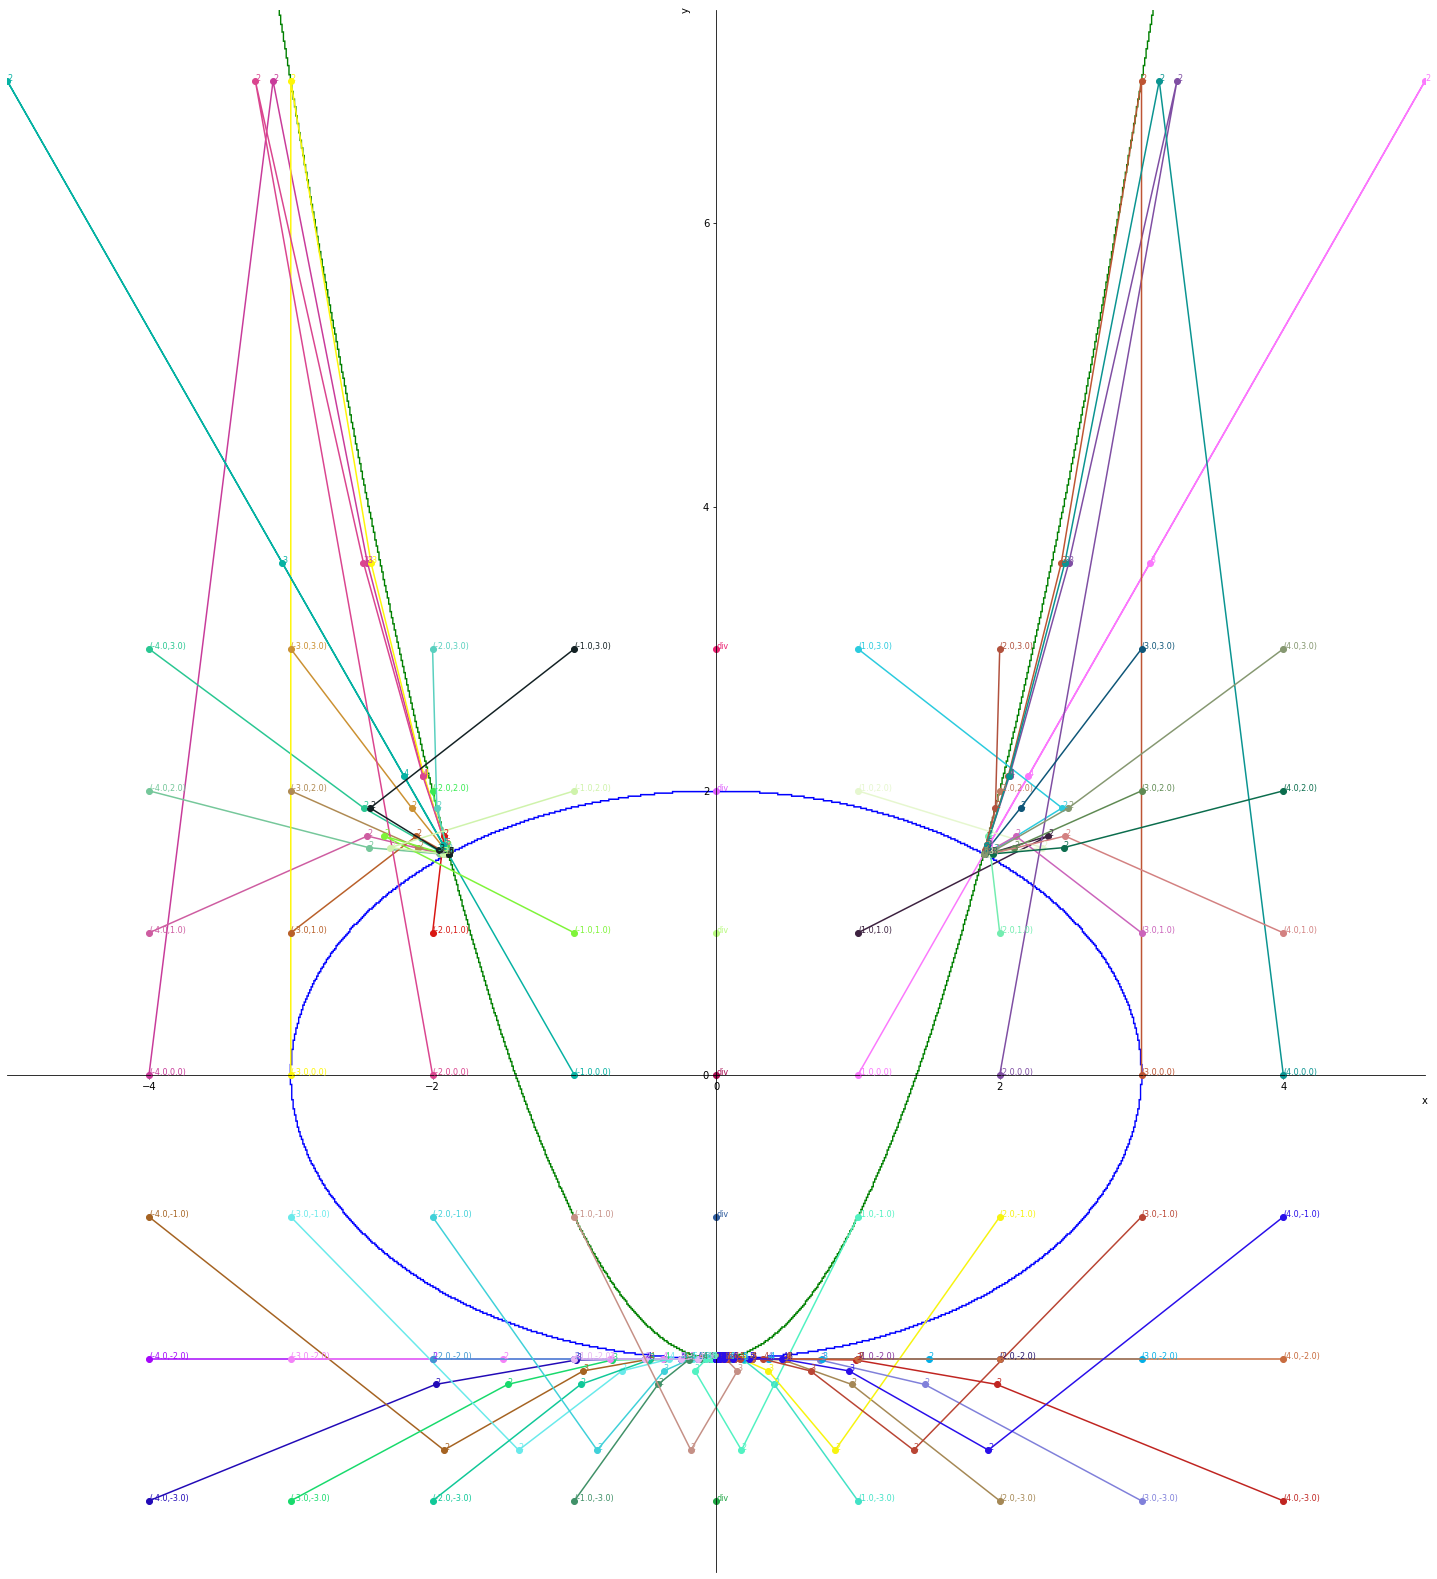

In [28]:
from ast import literal_eval
import random
points=[[[],[]]]
ps=[[],[]]

file=open('file.out', mode='r')
for i in range(7):
    words=file.readline()
words=file.readlines()
for w in words:
    if(w[0]=='s' or w[0]=='\n' or w[0]=='i' or w[0]=='u'):continue
    if(w[0]=='d'):# diverge
        points.append(ps)
        #print(ps)
        ps=[[],[]]
        continue
    if(w[0]=='f'):
        points.append(ps)
        #print(ps)
        ps=[[],[]]
        continue
    if(w[1]=='i'):continue
    str1=w.split(' ')
    if(str1[0]==''):
        ps[0].append(literal_eval(str1[3]))
        ps[1].append(literal_eval(str1[4]))
    else:
        ps[0].append(literal_eval(str1[2]))
        ps[1].append(literal_eval(str1[3]))
    
file.close()
fig, axe = get_sympy_subplots(p1)
# add points and lines
for pt in points:
    c=(random.random(),random.random(),random.random()) # 每個initial point有一個隨機color
    axe.plot(pt[0],pt[1],"o",color=c)
    axe.plot(pt[0],pt[1],color=c)
    if(len(pt[0])==1):axe.text(pt[0][0],pt[1][0],'div',color=c,fontsize=8)
    else:
        for i in range(len(pt[0])):
            if(i>0):
                axe.text(pt[0][i],pt[1][i],i+1,color=c,fontsize=8)
            else:
                axe.text(pt[0][i],pt[1][i],'('+str(pt[0][i])+','+str(pt[1][i])+')',color=c,fontsize=8)

In [ ]:
from ast import literal_eval
import random

fig, axe = get_sympy_subplots(p1)
c1=(1,1,0)
c2=(0,1,0)
c3=(0,1,1)
c4=(0,0,0)
# add points and lines
for pt in points:
    c=c1
    if(len(pt[0])>=1):
      if(pt[0][len(pt[0])-1]<-1):c=c1
      elif(pt[0][len(pt[0])-1]>1):c=c2
      else:c=c3
    else:c=c4
    axe.plot(pt[0],pt[1],"o",color=c)
    axe.plot(pt[0],pt[1],color=c)
    if(len(pt[0])==1):
      c=c4
      axe.text(pt[0][0],pt[1][0],'div',color=c,fontsize=8)
    else:
        for i in range(len(pt[0])):
            if(i>0):
                axe.text(pt[0][i],pt[1][i],i+1,color=c,fontsize=8)
            else:
                axe.text(pt[0][i],pt[1][i],'('+str(pt[0][i])+','+str(pt[1][i])+')',color=c,fontsize=8)

In [ ]:
# 繪製動畫
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ast import literal_eval
import random
import time
from math import *

plt.rcParams['figure.figsize'] = 12,8 # 更改圖片大小

def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]


x, y = symbols('x y')
rangex=(x,-4.5, 4.5)
rangey=(y,-3, 3)
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,rangex,rangey,show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,rangex,rangey,show=False)

# set line color
p1[0].line_color = 'b'
p2[0].line_color = 'g'

p1.extend(p2)

# 讀取檔案點資訊
ps=[[],[]]
file=open('animation4.out', mode='r')
for i in range(7):
    words=file.readline()
words=file.readlines()
for w in words:
    if(w[0]=='s' or w[0]=='\n' or w[0]=='i' or w[0]=='u'):continue
    if(w[0]=='d'):# diverge
        continue
    if(w[0]=='f'):
        continue
    if(w[1]=='i'):continue
    str1=w.split(' ')
    if(str1[0]==''):
        ps[0].append(literal_eval(str1[3]))
        ps[1].append(literal_eval(str1[4]))
    else:
        ps[0].append(literal_eval(str1[2]))
        ps[1].append(literal_eval(str1[3]))
    
file.close()

# 繪製圖形:標誌座標和編號
fig, axe = get_sympy_subplots(p1)
if(len(ps[0])==1):axe.text(ps[0][0],ps[1][0],'div',color='purple',fontsize=18)
else:
    for i in range(len(ps[0])):
        if(i>0):
            axe.text(ps[0][i],ps[1][i],i+1,color='purple',fontsize=18)
        else:
            axe.text(ps[0][i],ps[1][i],'('+str(ps[0][i])+','+str(ps[1][i])+')',color='purple',fontsize=18)
# 繪製圖形及動畫
line, = axe.plot(ps[0], ps[1], color='purple', linestyle='-', linewidth=1)
dot, = axe.plot([], [], color='red', marker='o', markersize=10, linestyle='')
def update(i):
    dot.set_data(ps[0][i], ps[1][i])
    return dot,

def init():
    dot.set_data(ps[0][0], ps[1][0])
    return dot,
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(ps[0]), init_func=init, interval=10, blit=True, repeat=True)
plt.show()
ani.save('MovingPoint4.gif', writer='pillow', fps=1/0.3)

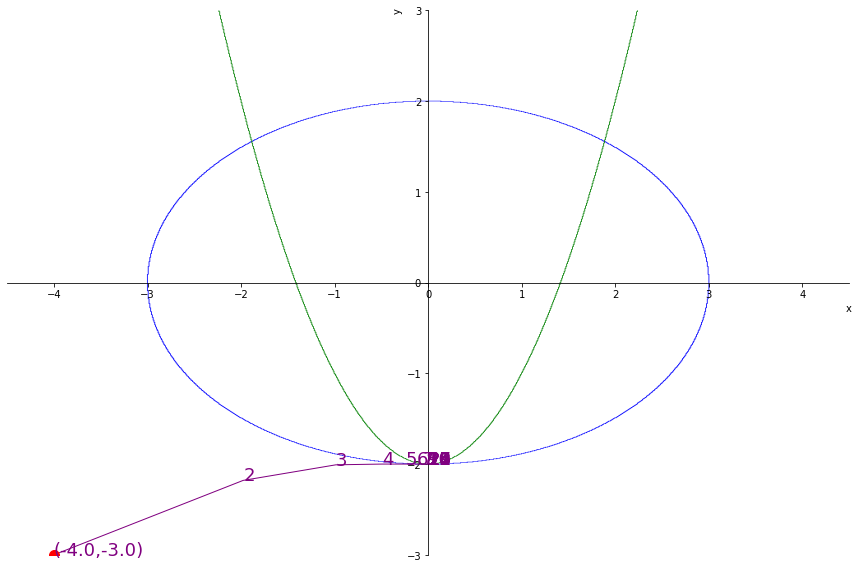

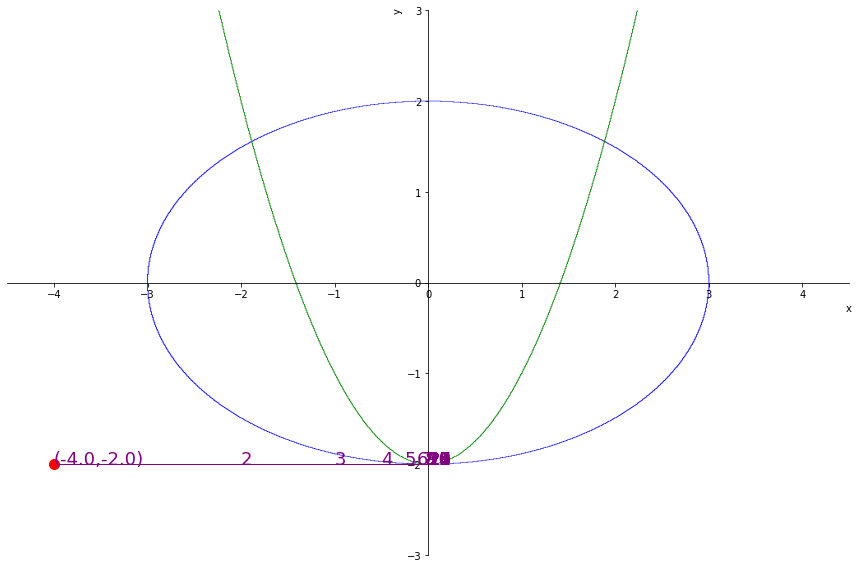

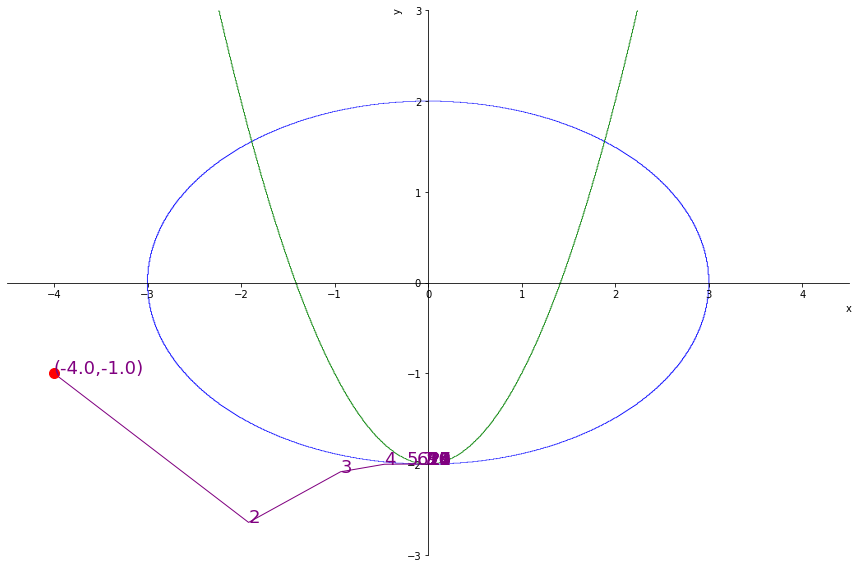

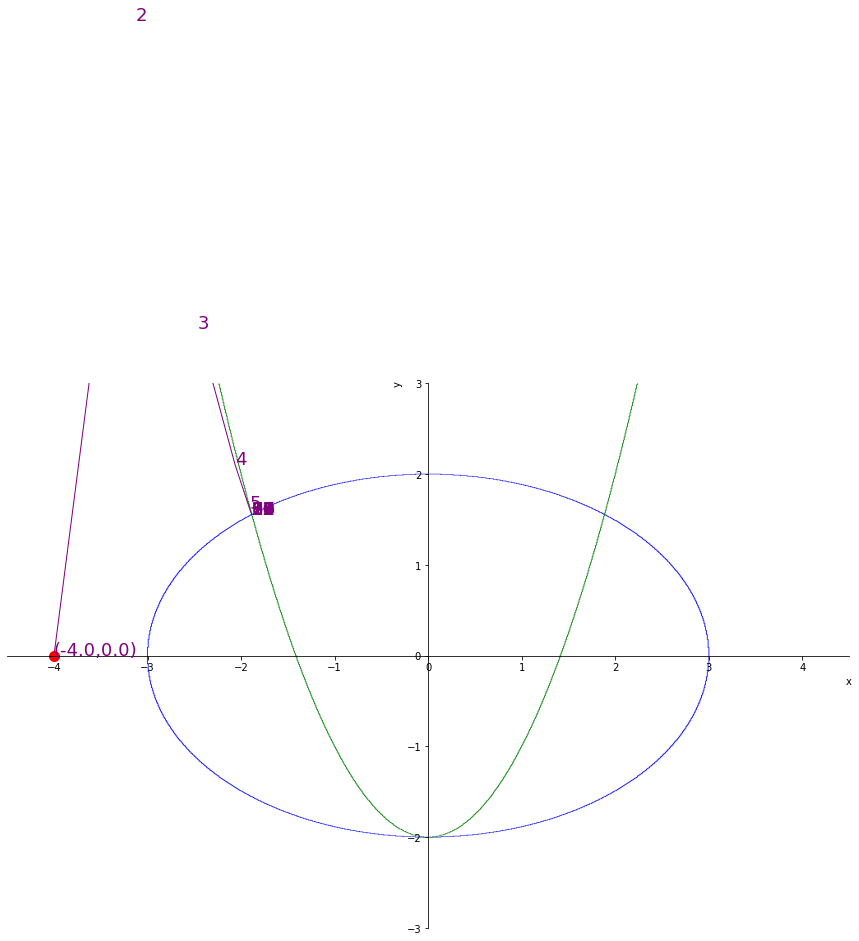

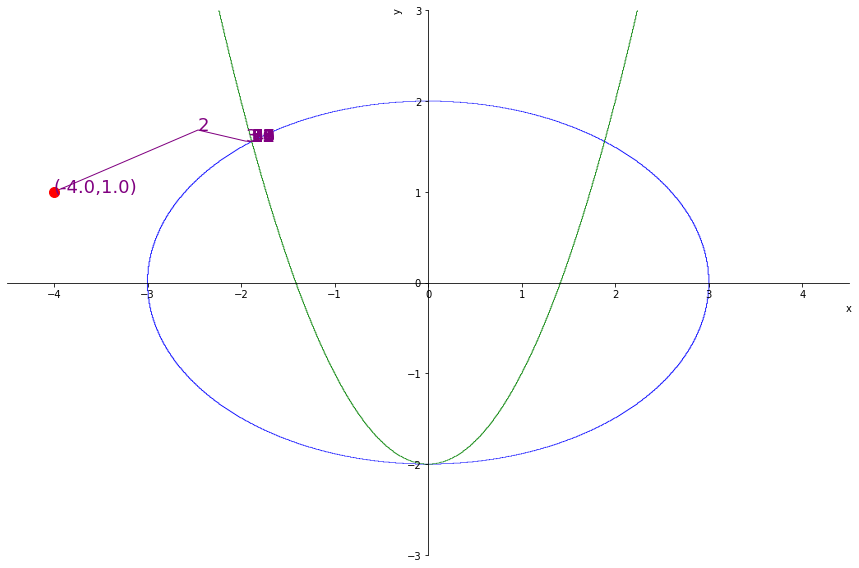

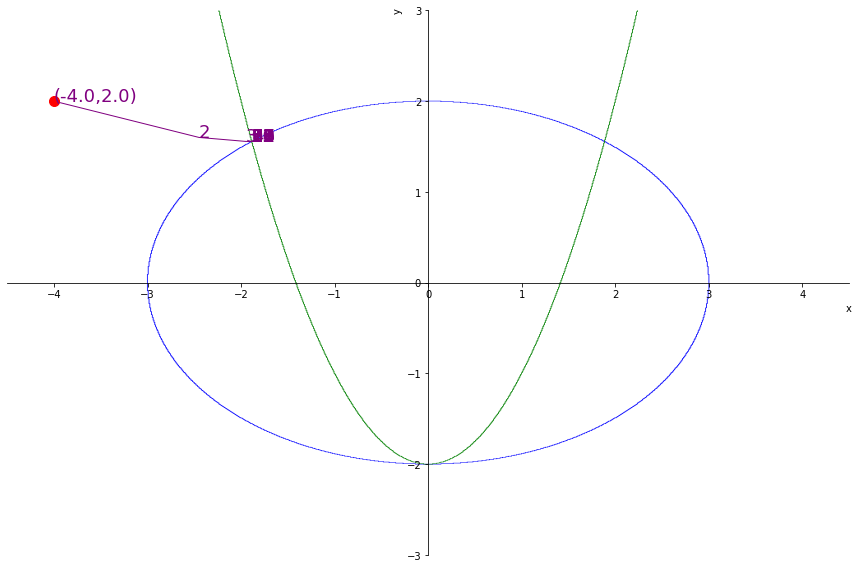

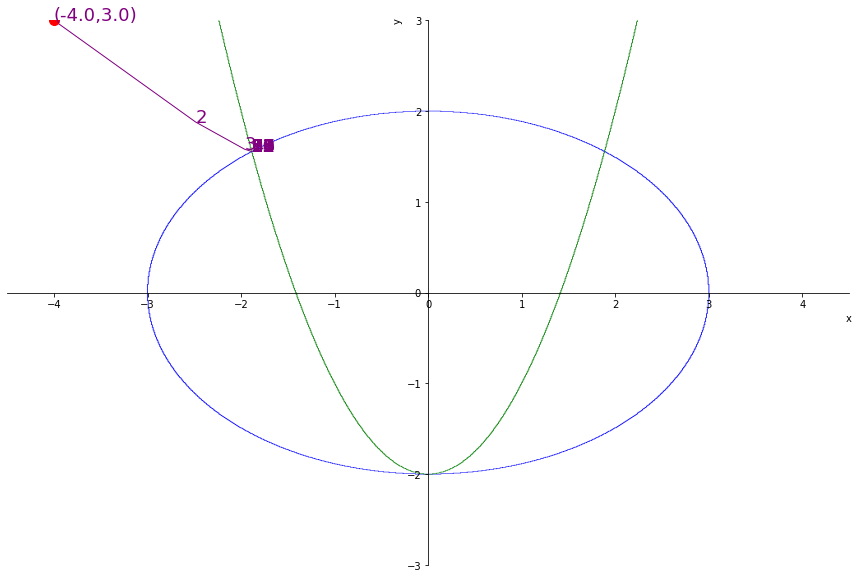

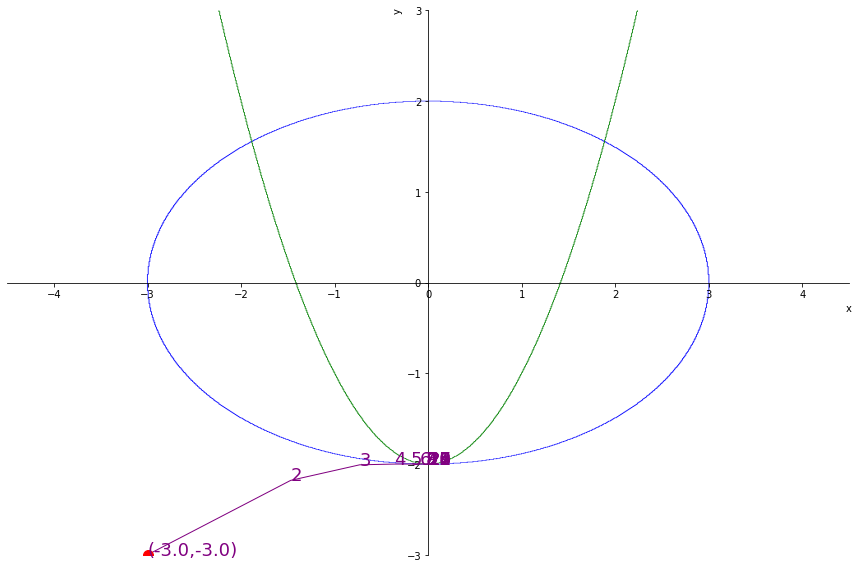

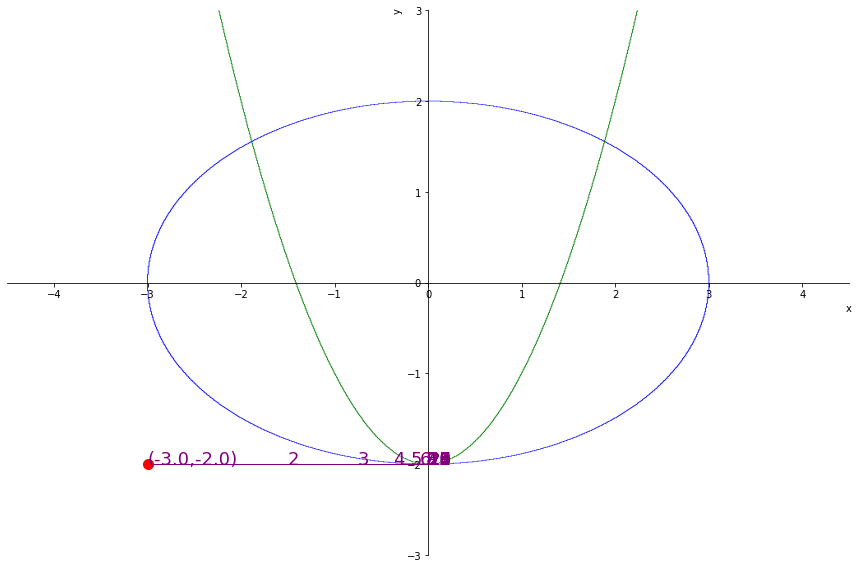

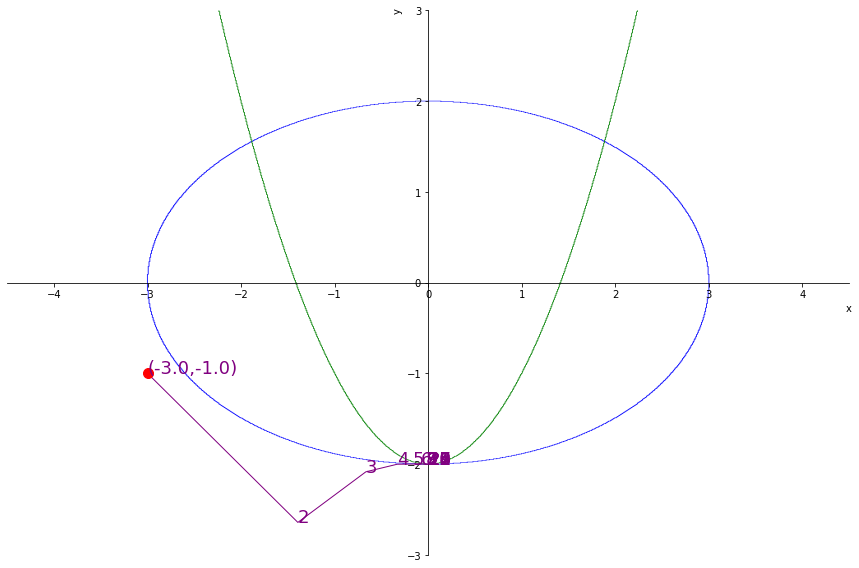

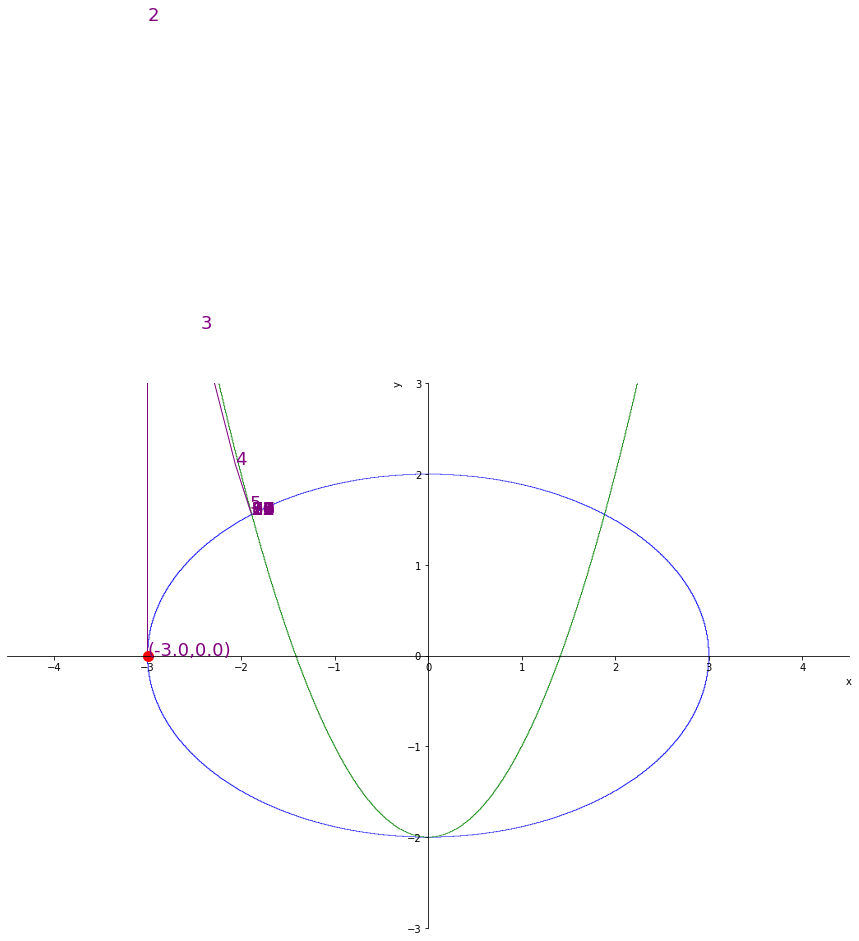

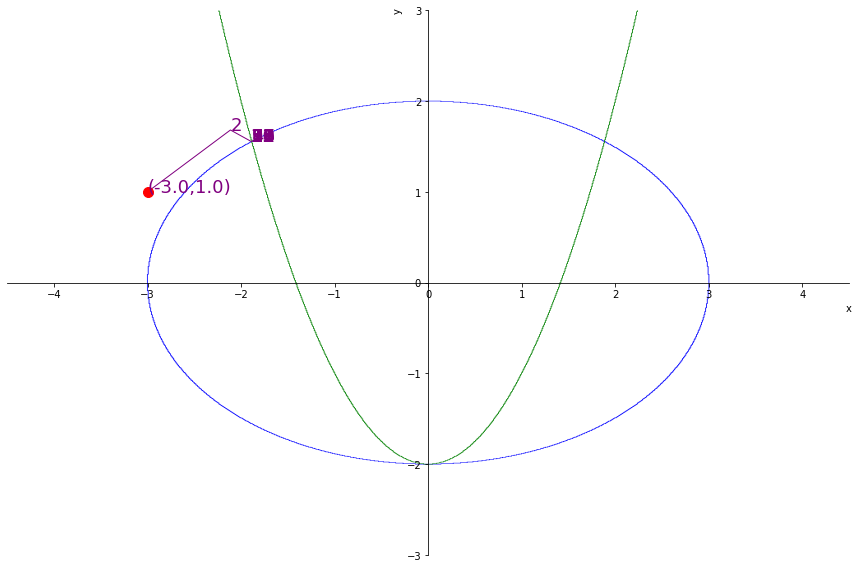

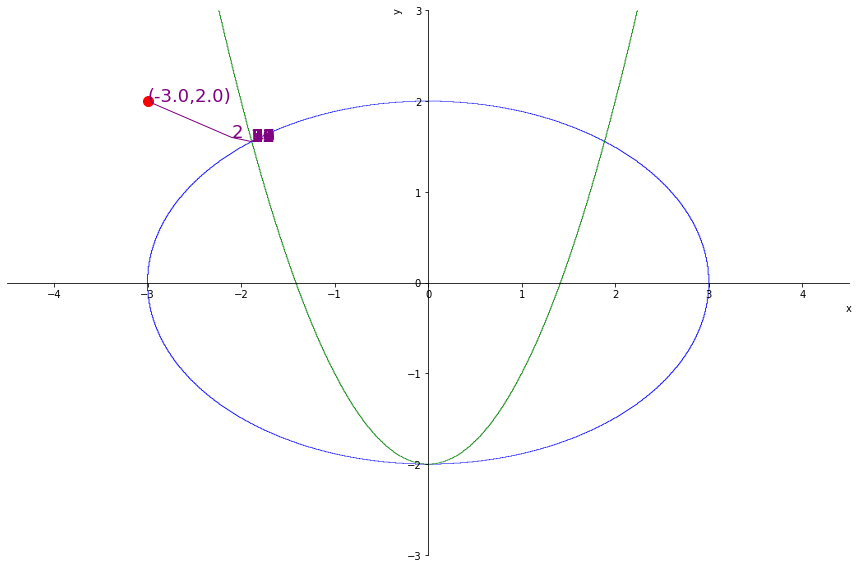

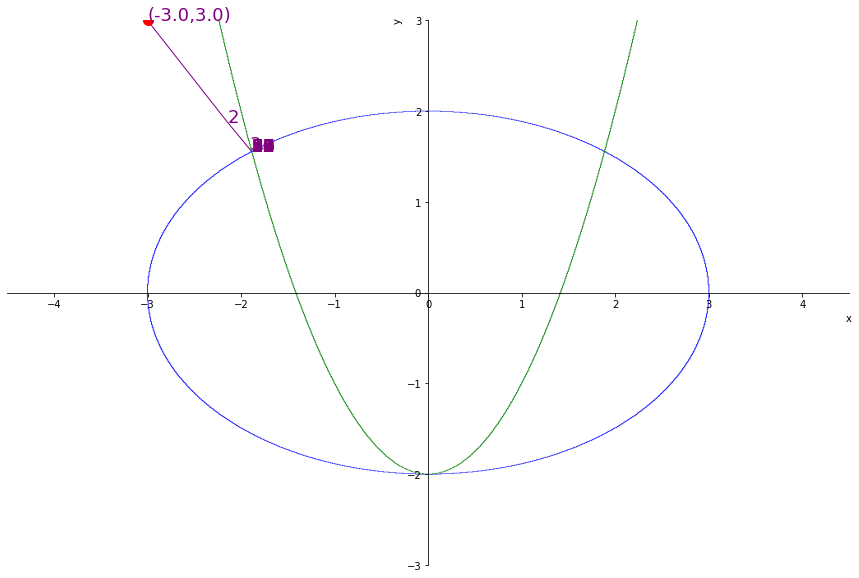

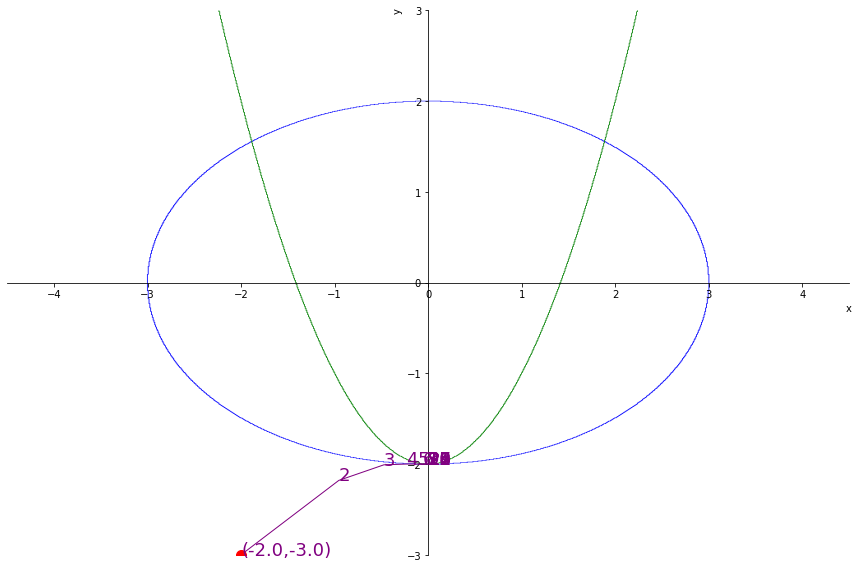

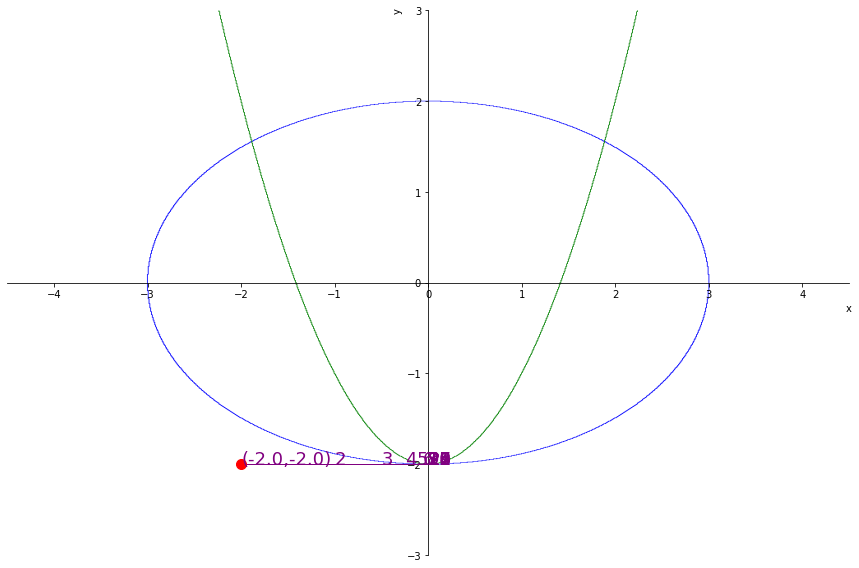

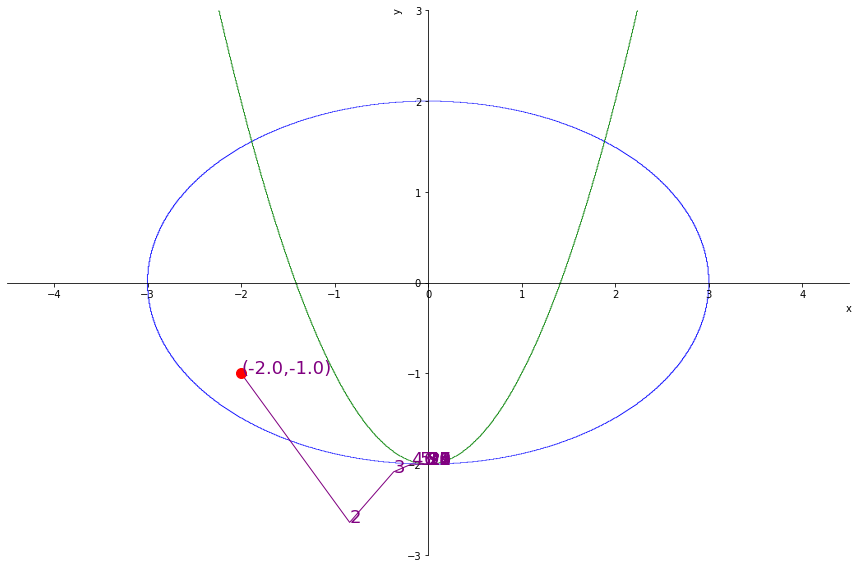

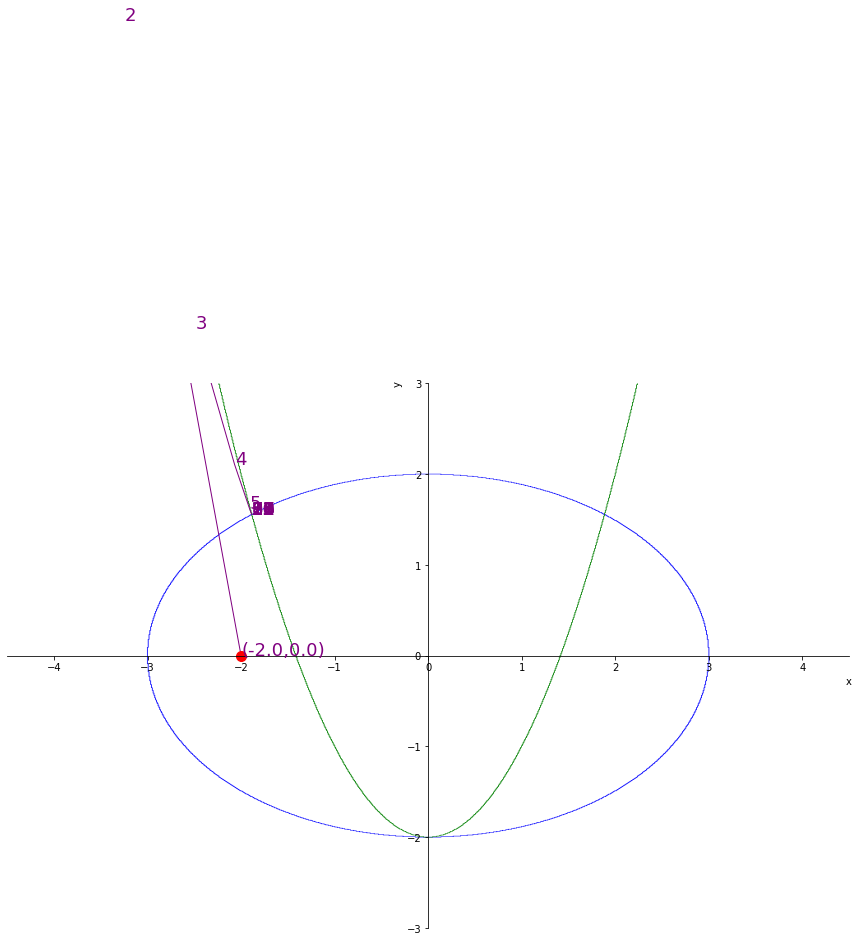

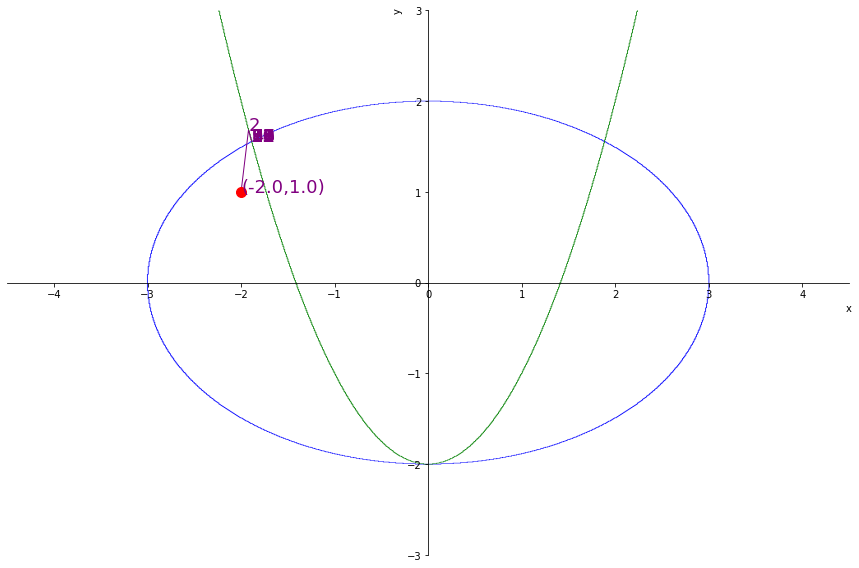

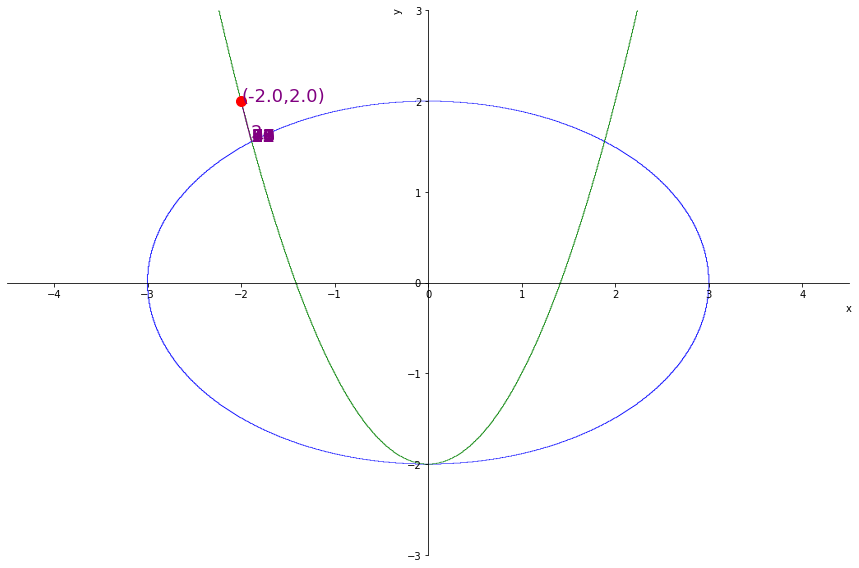

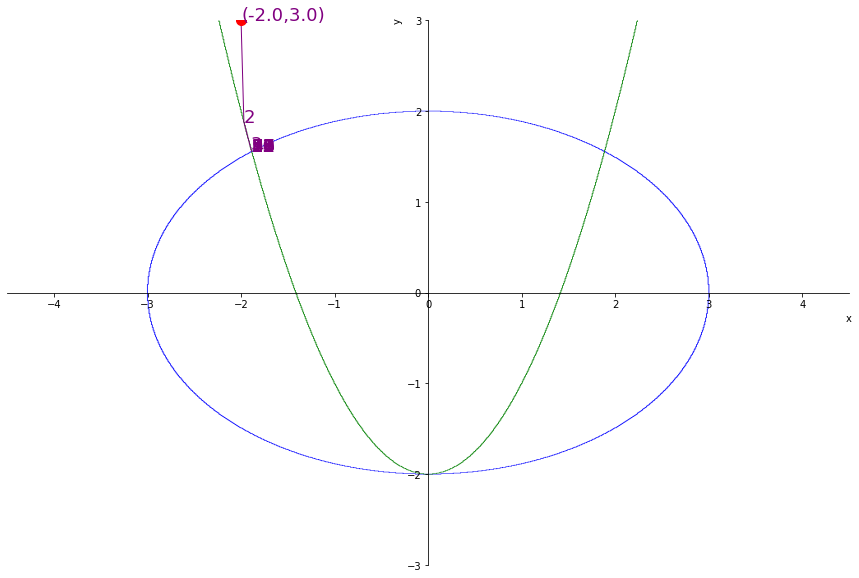

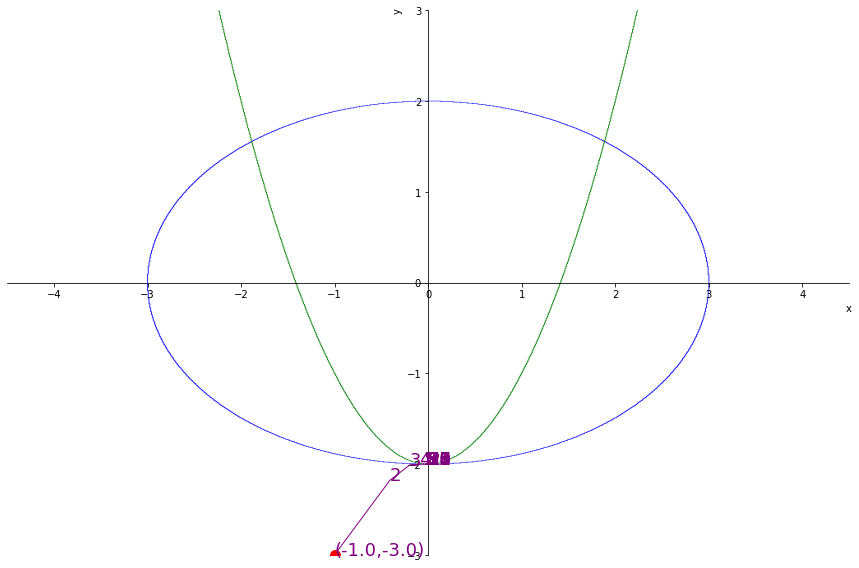

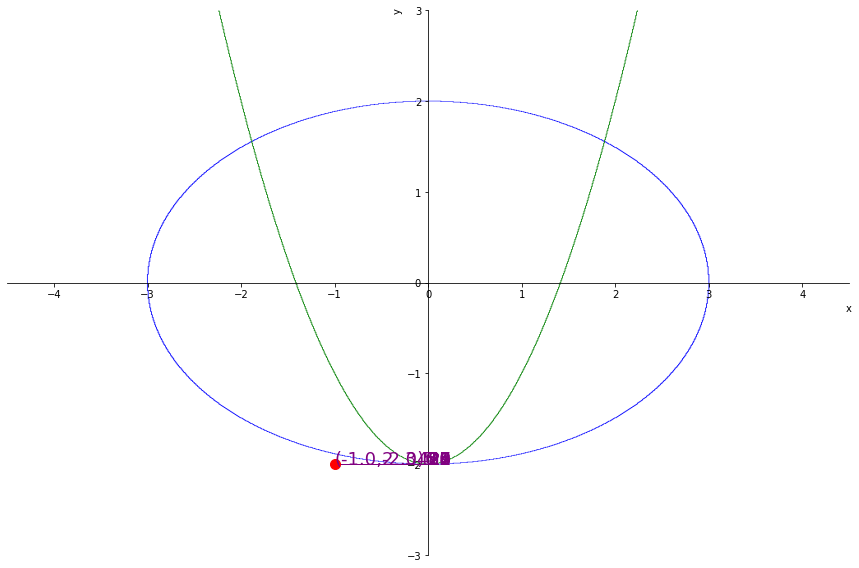

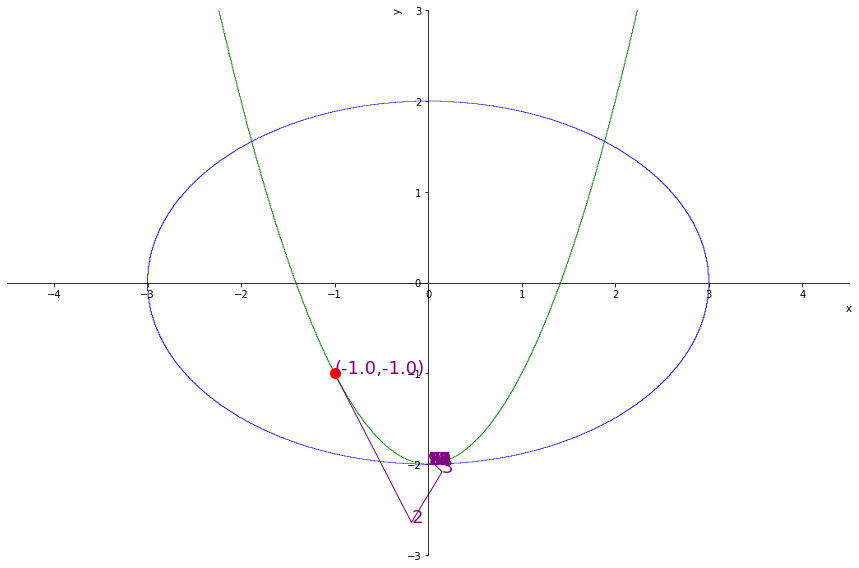

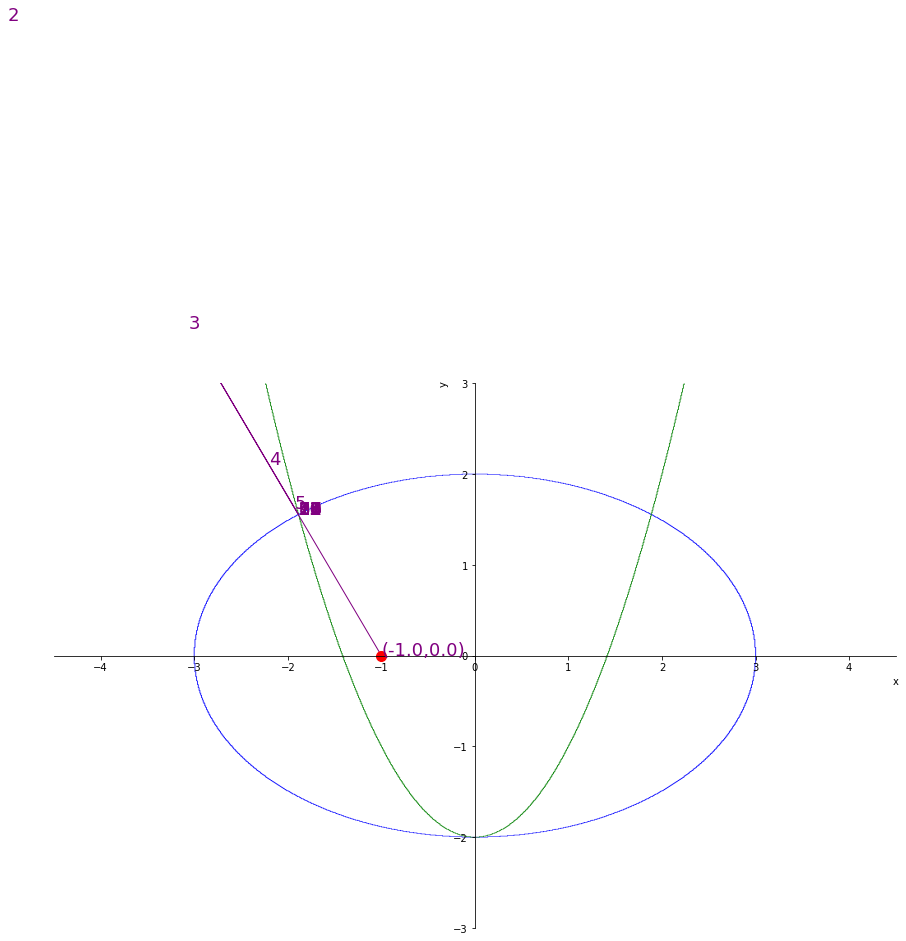

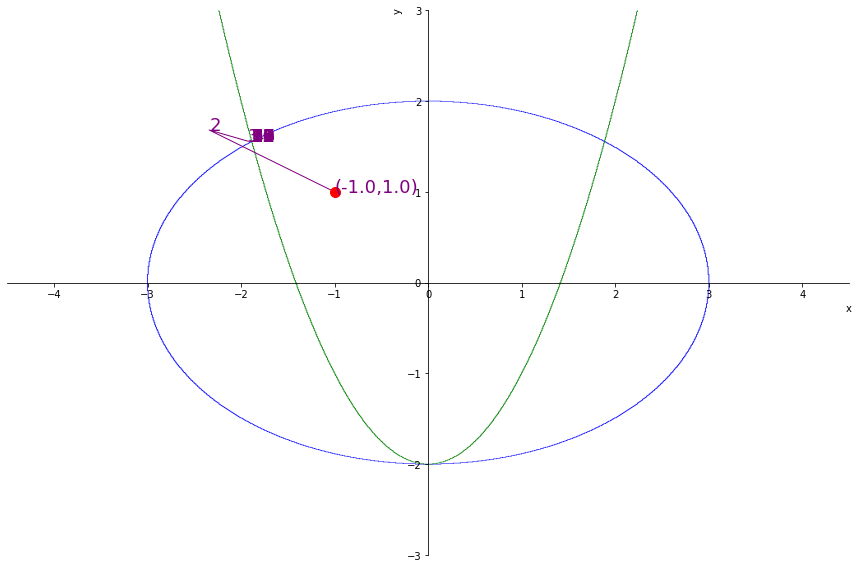

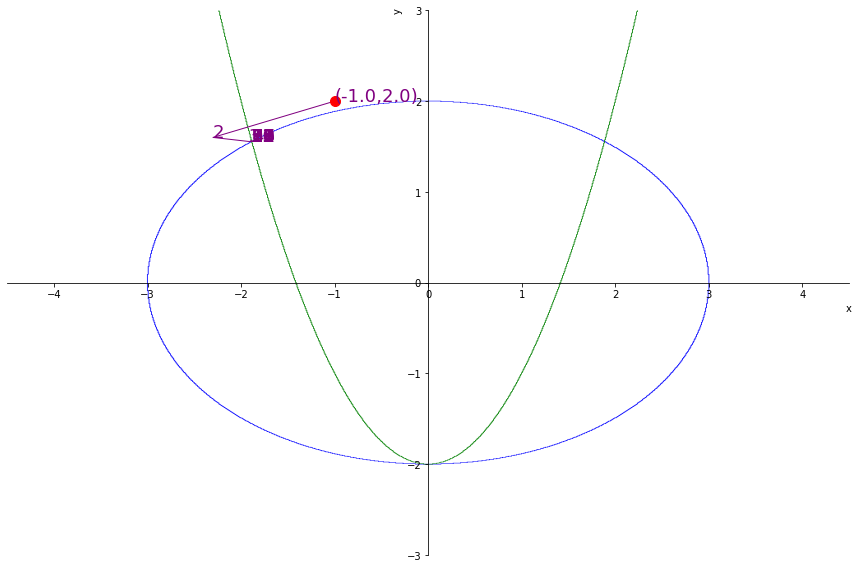

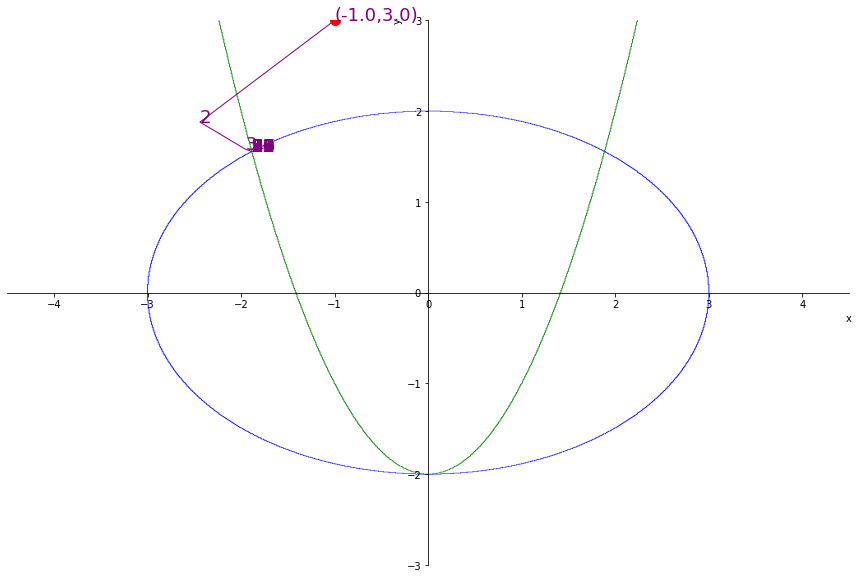

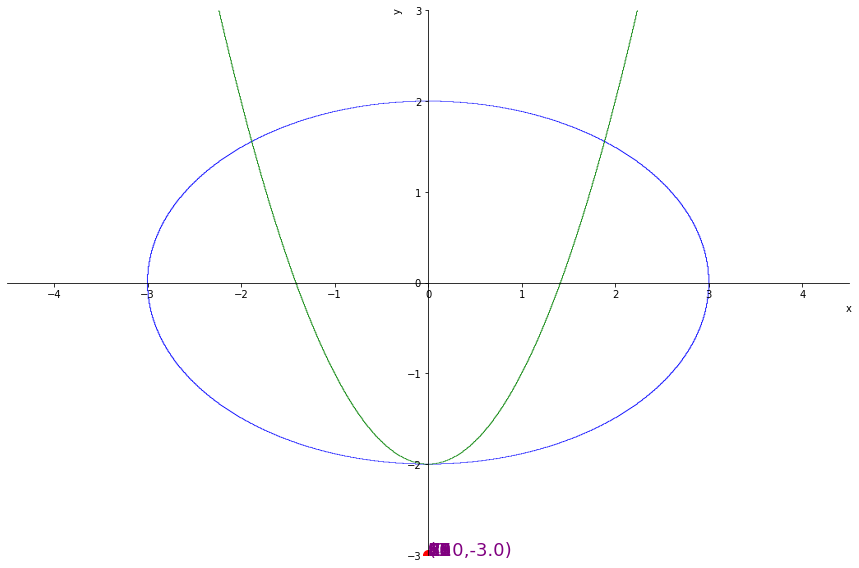

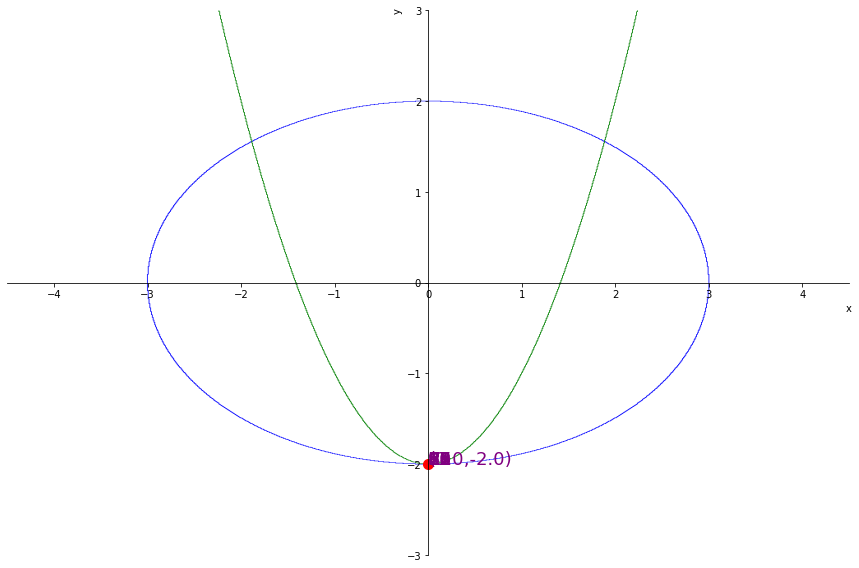

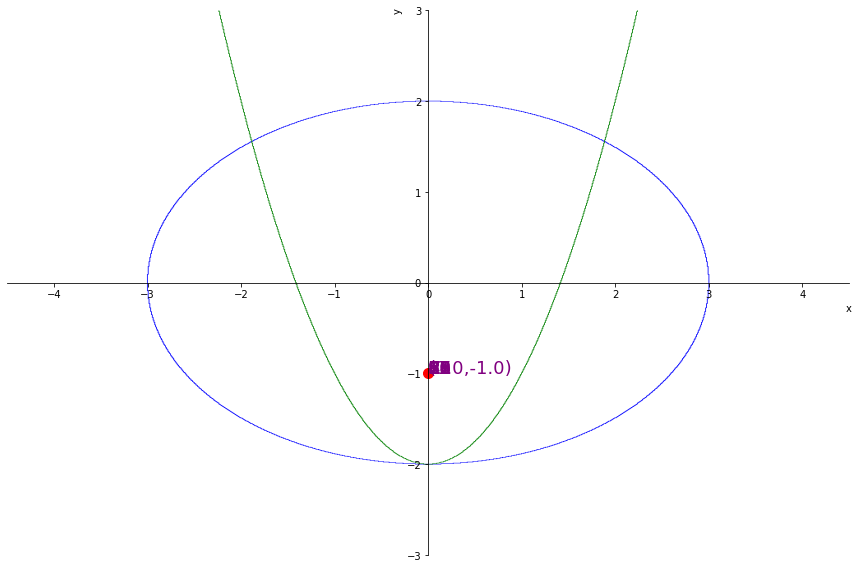

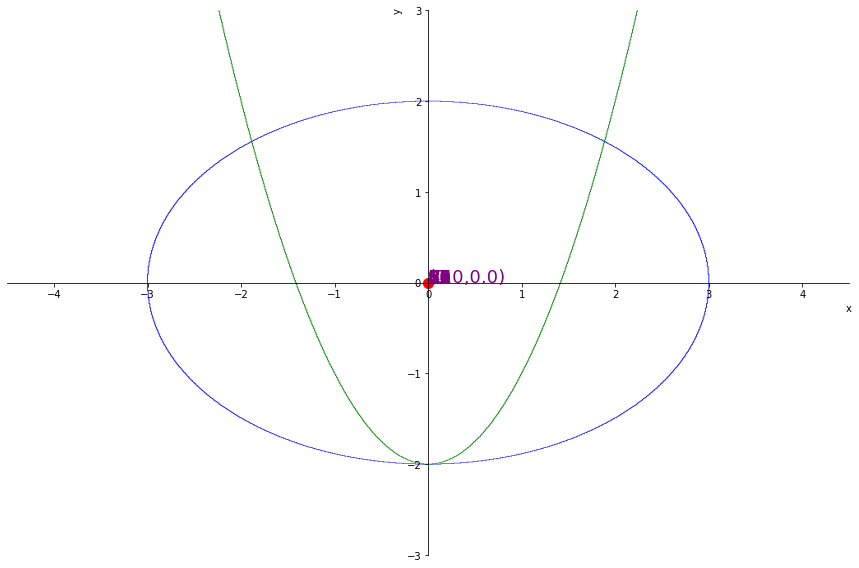

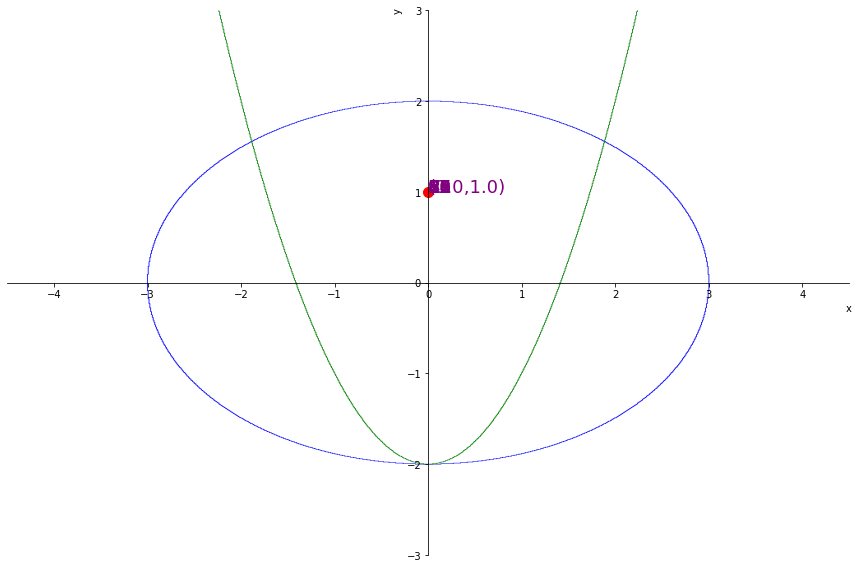

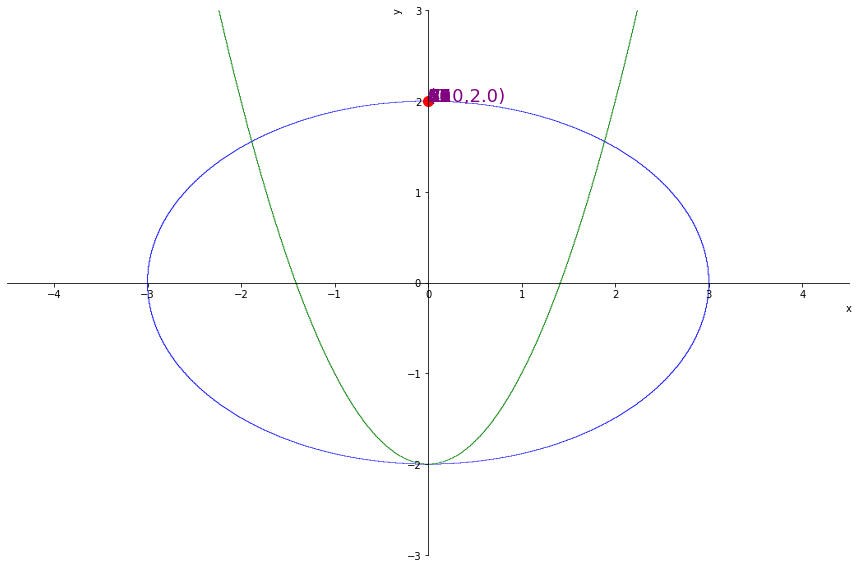

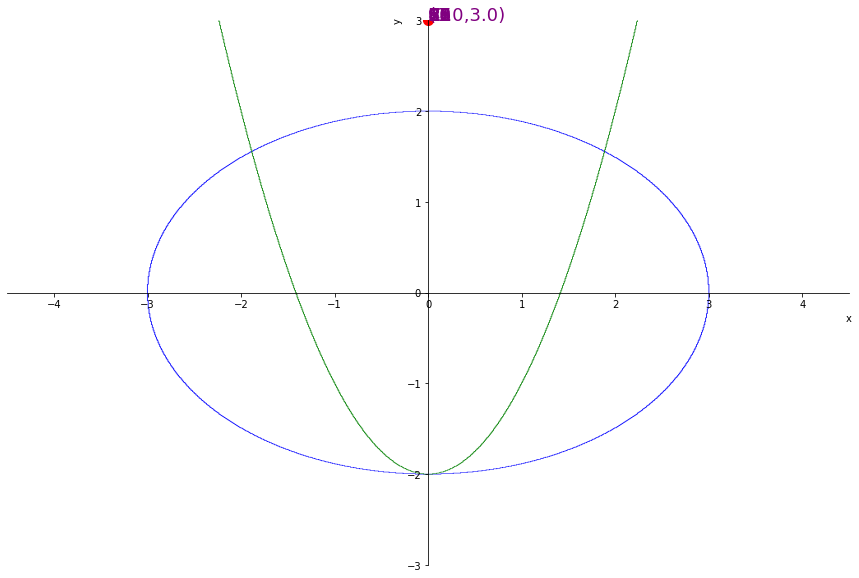

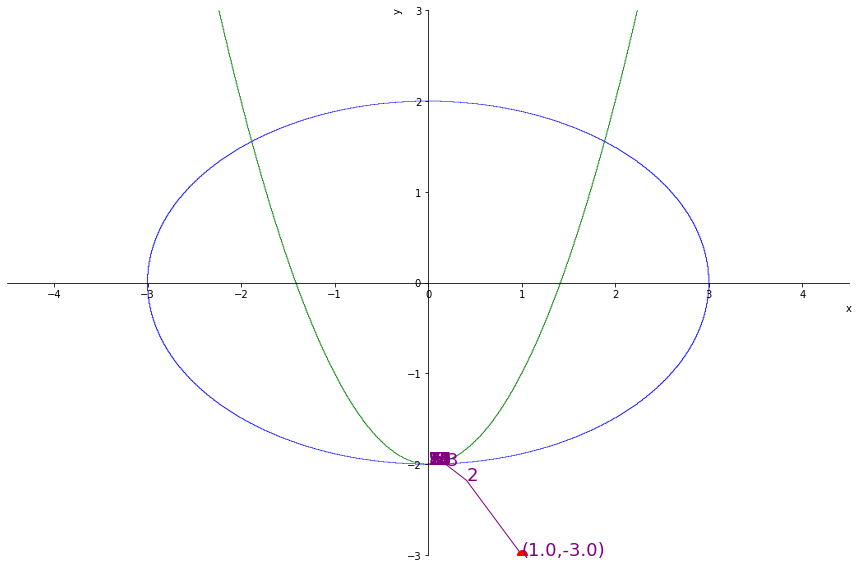

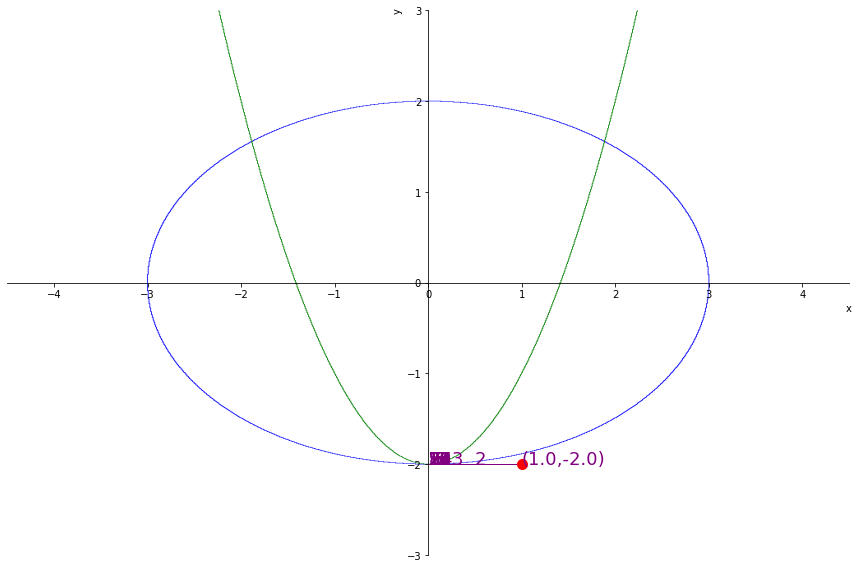

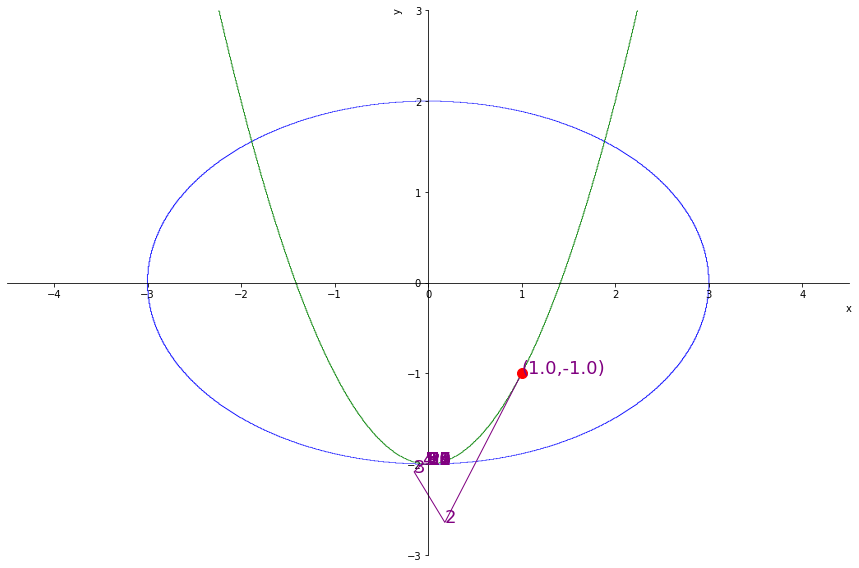

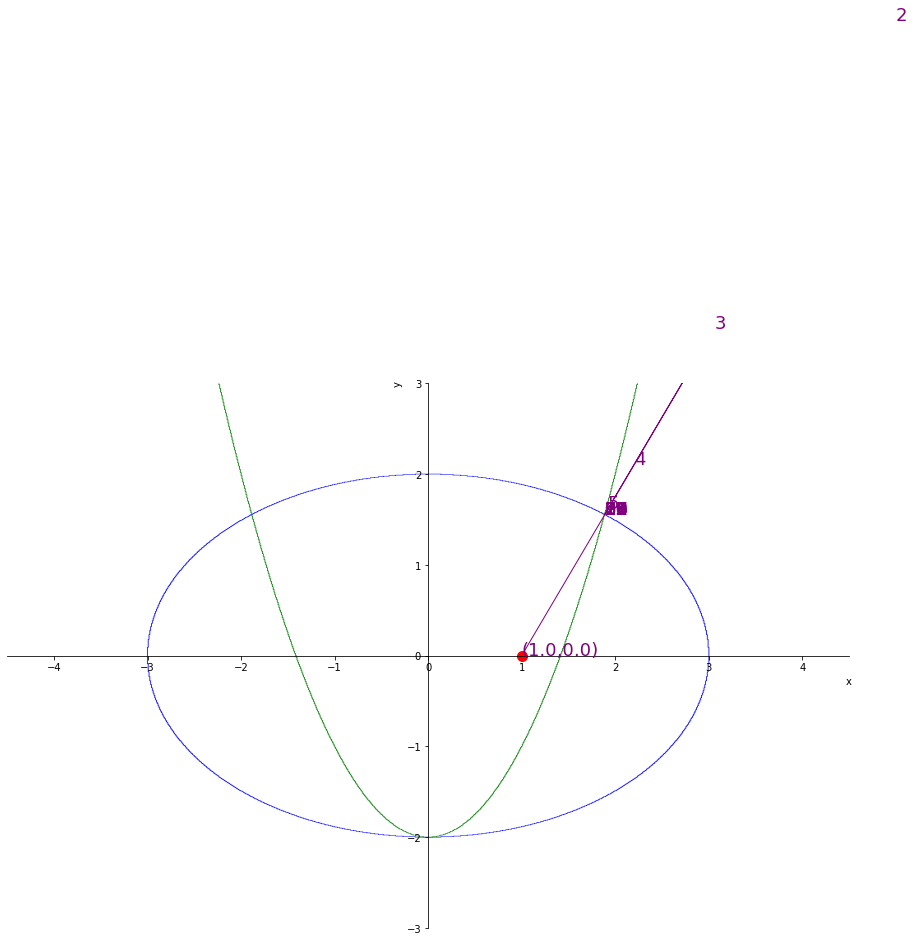

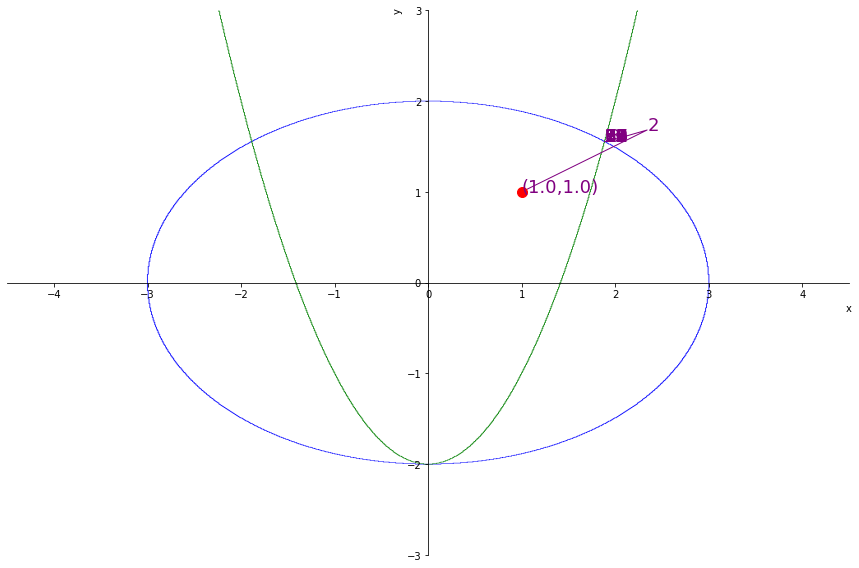

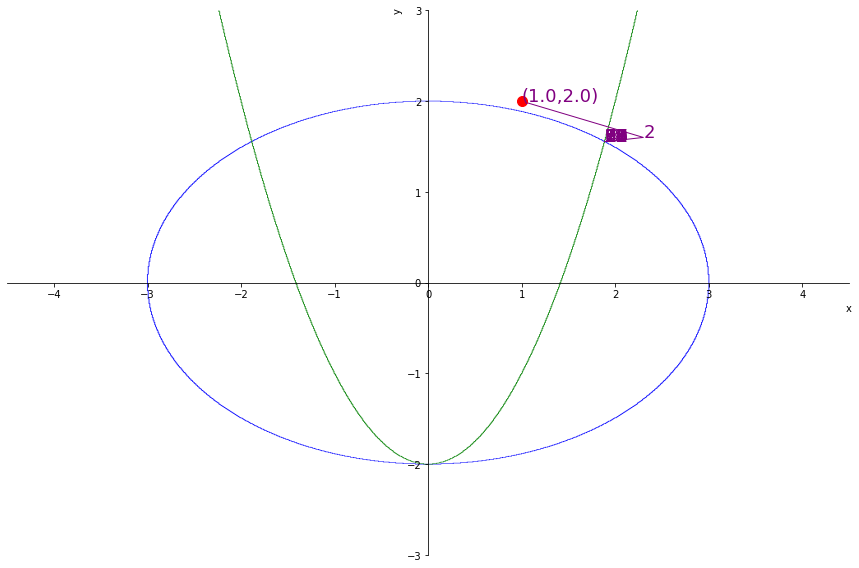

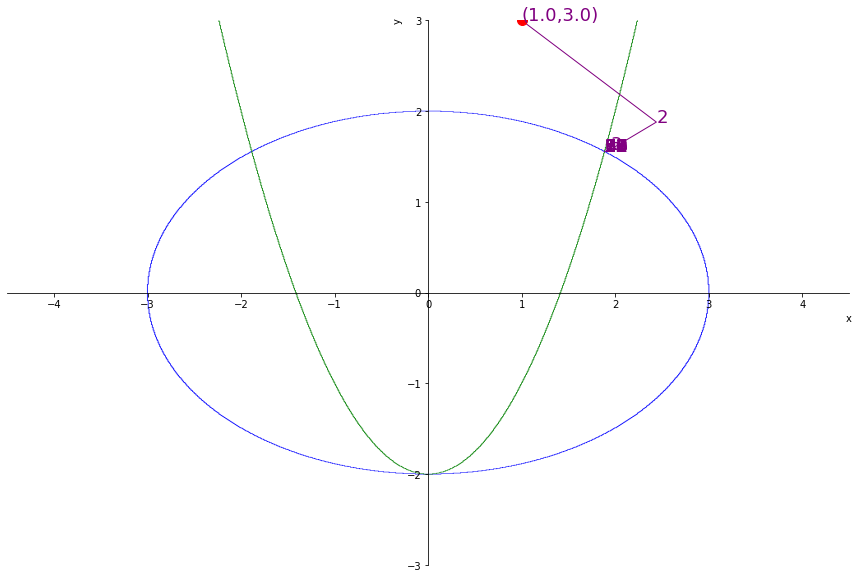

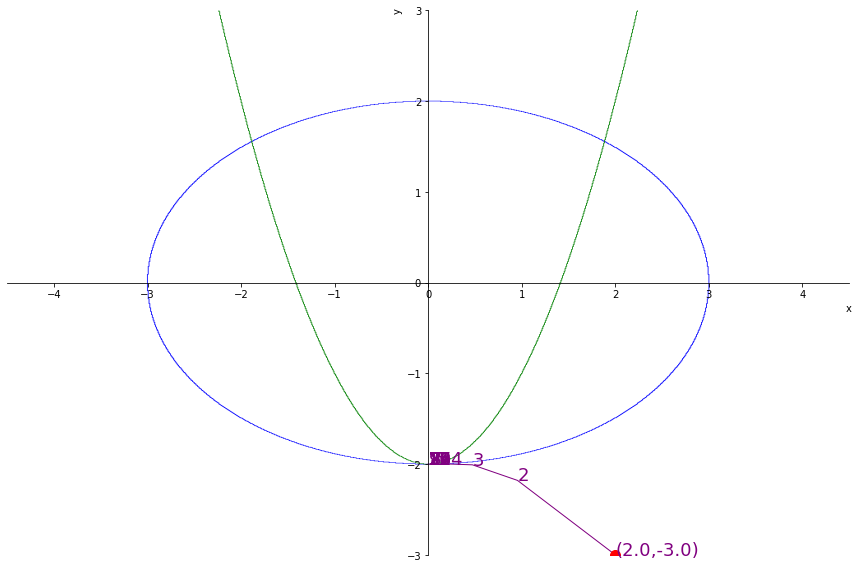

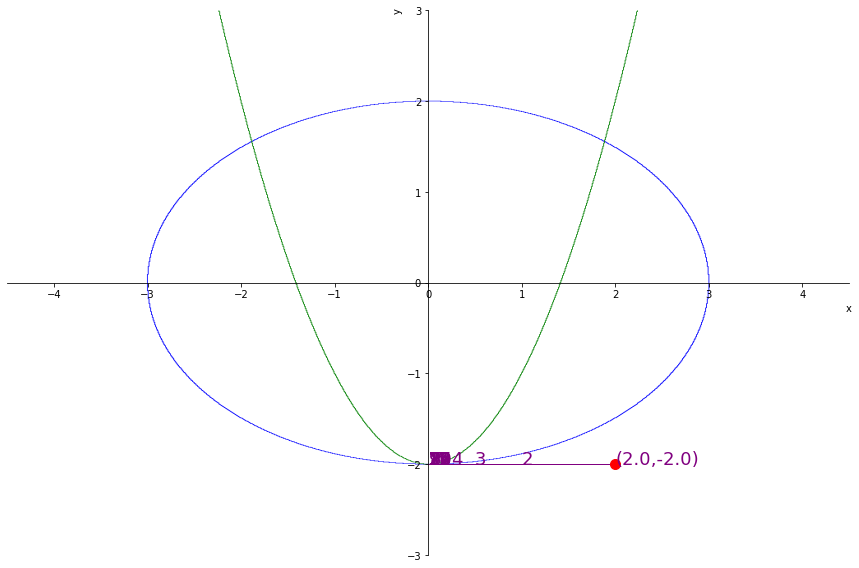

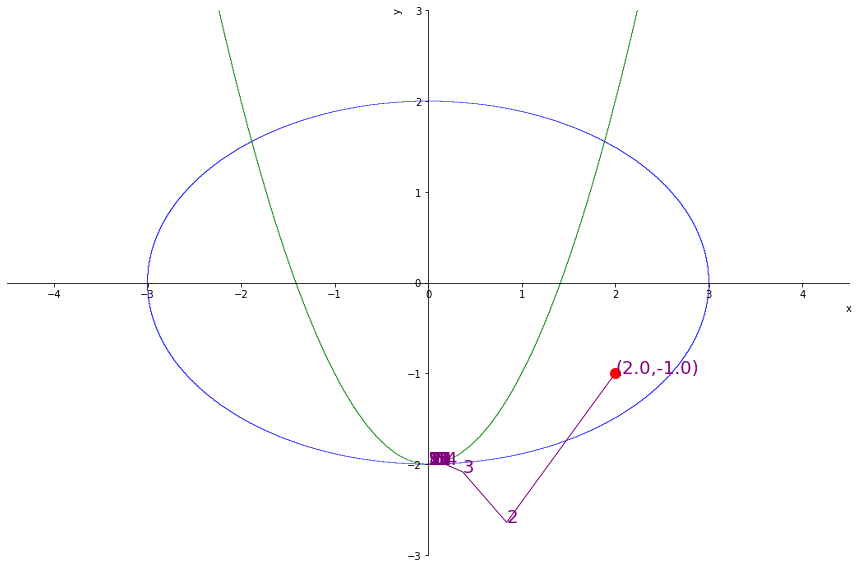

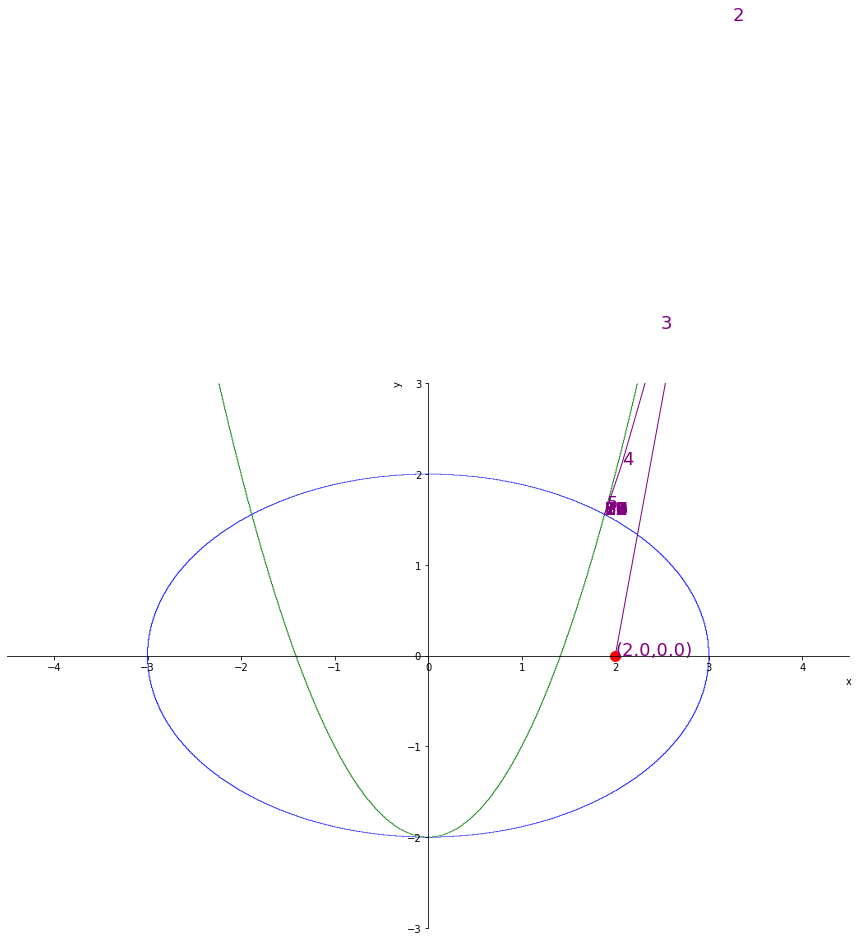

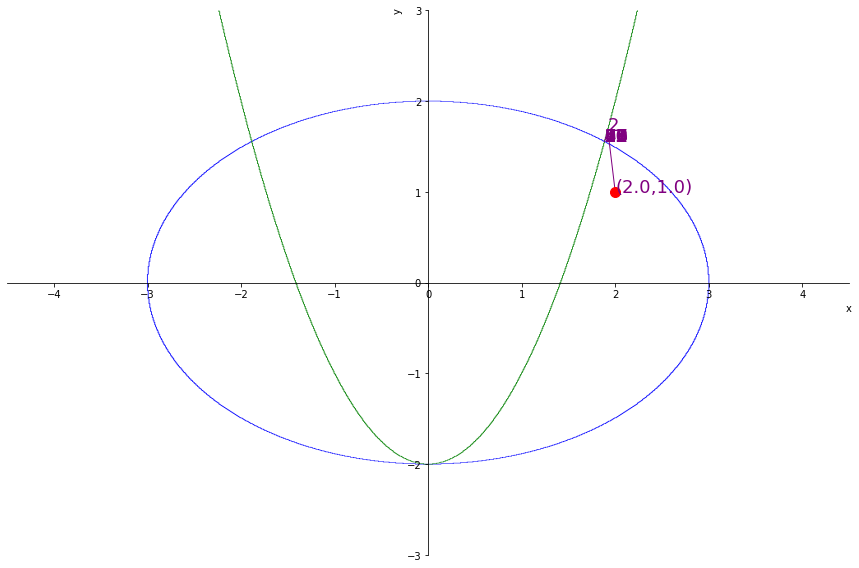

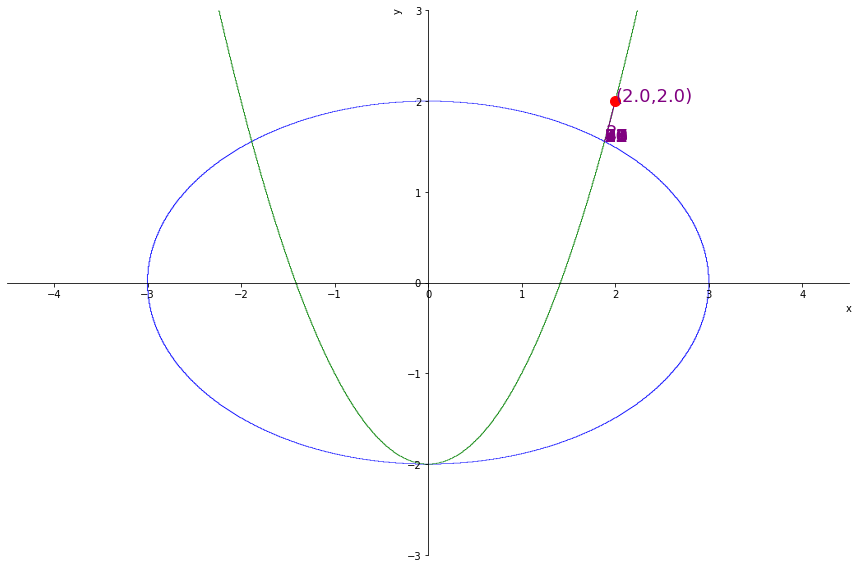

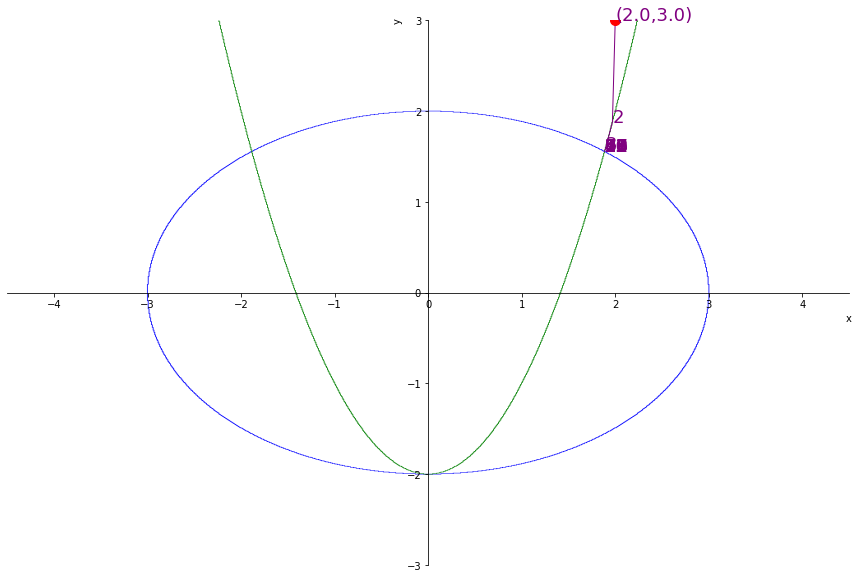

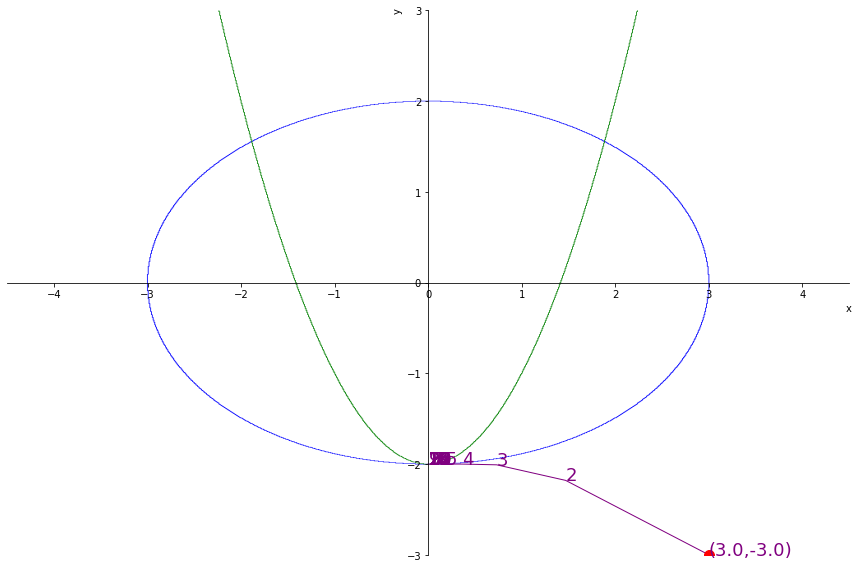

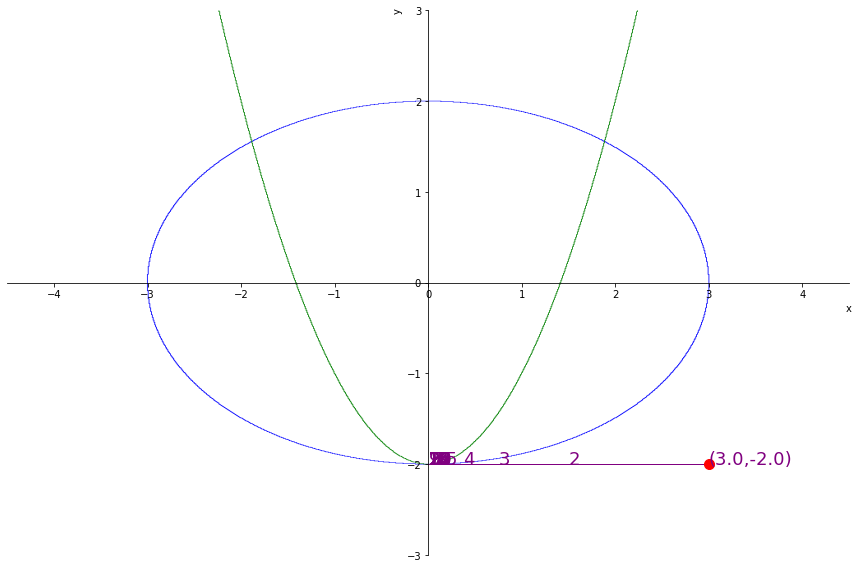

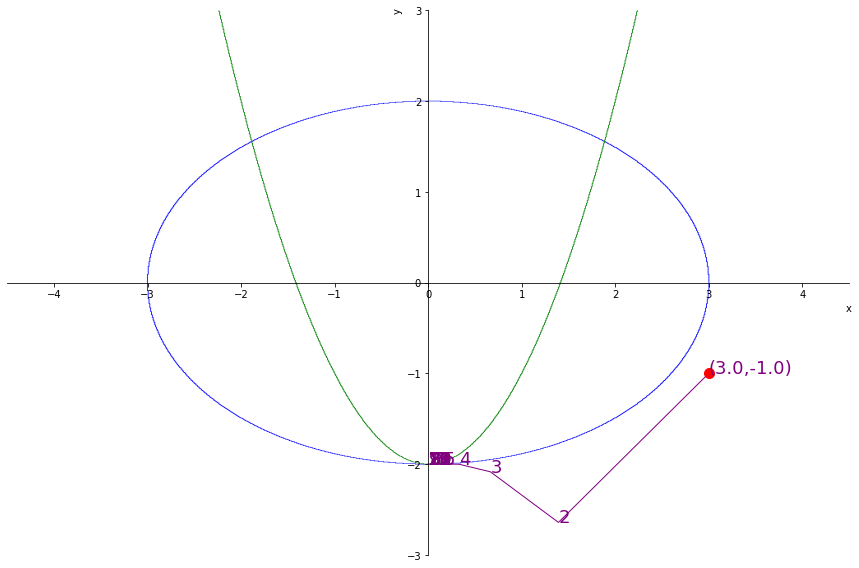

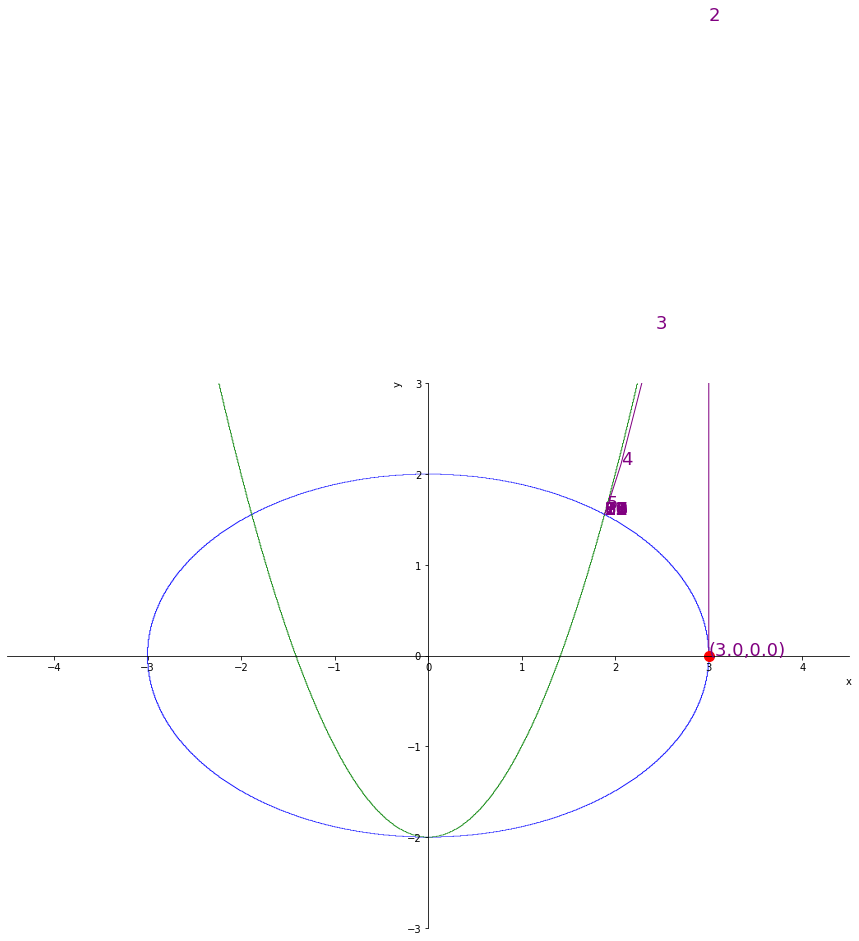

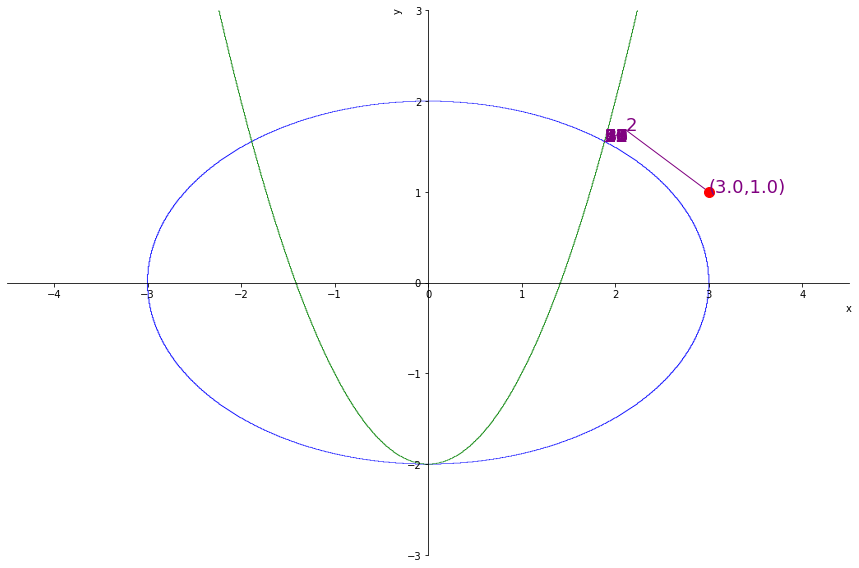

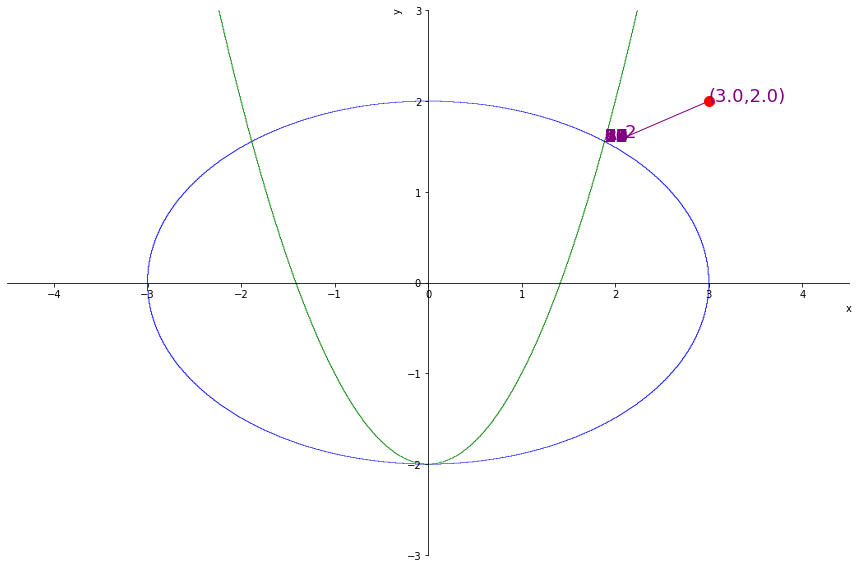

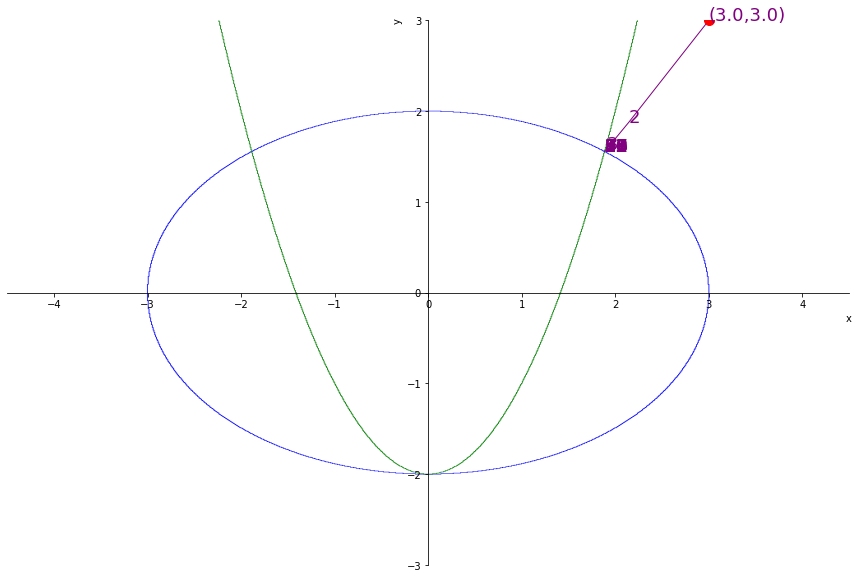

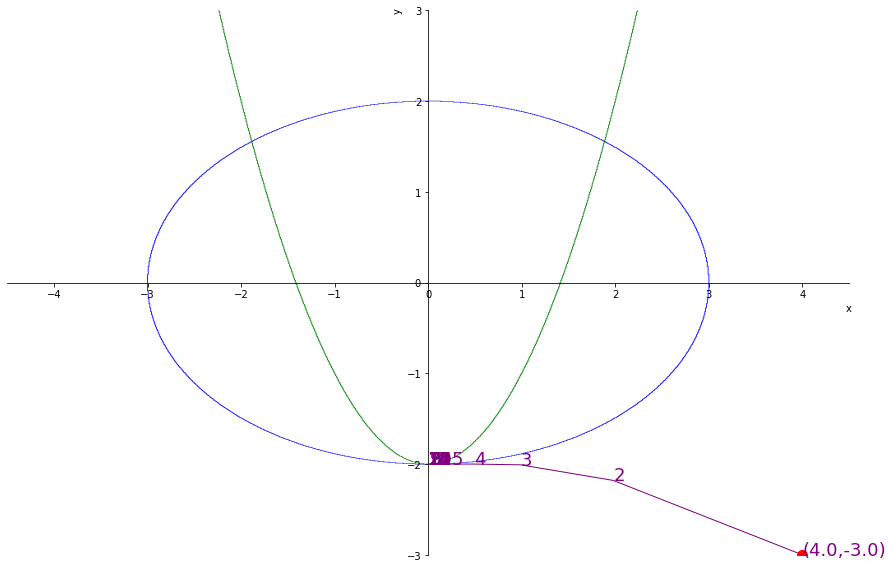

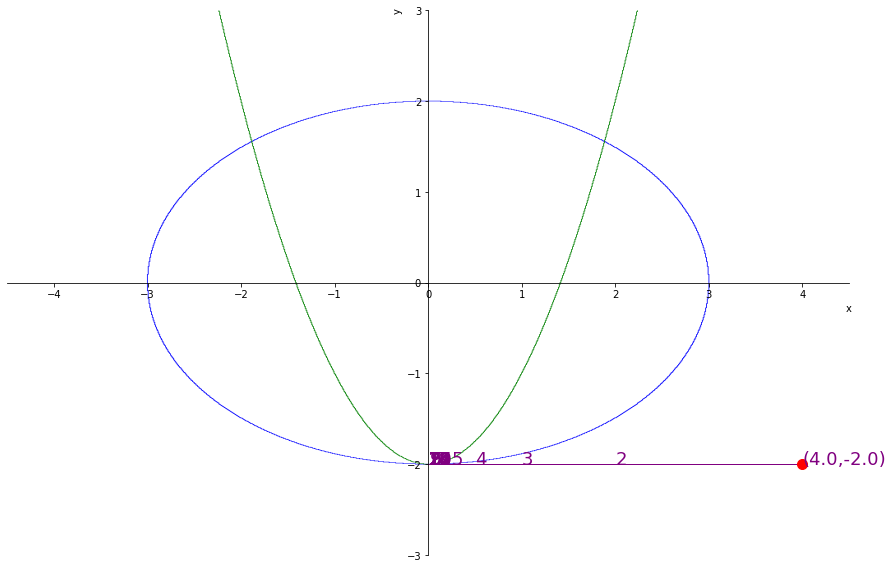

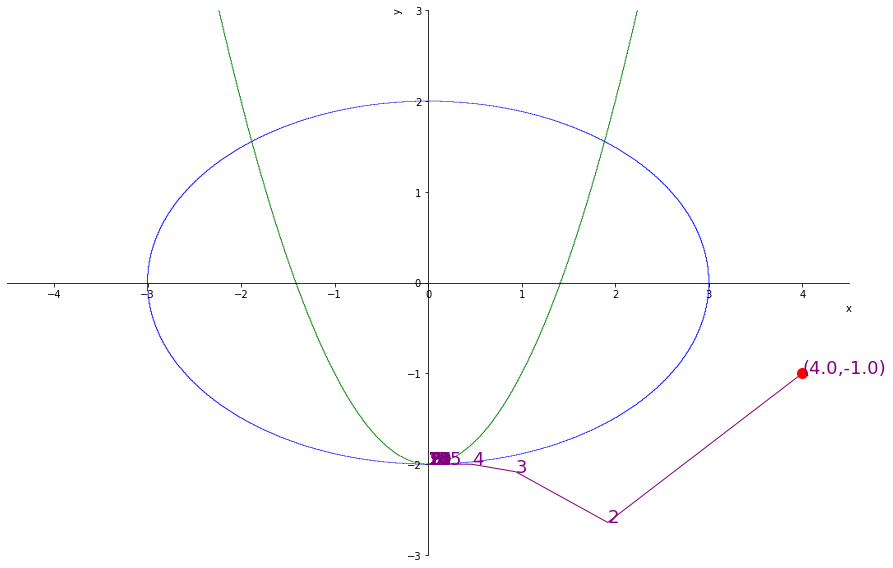

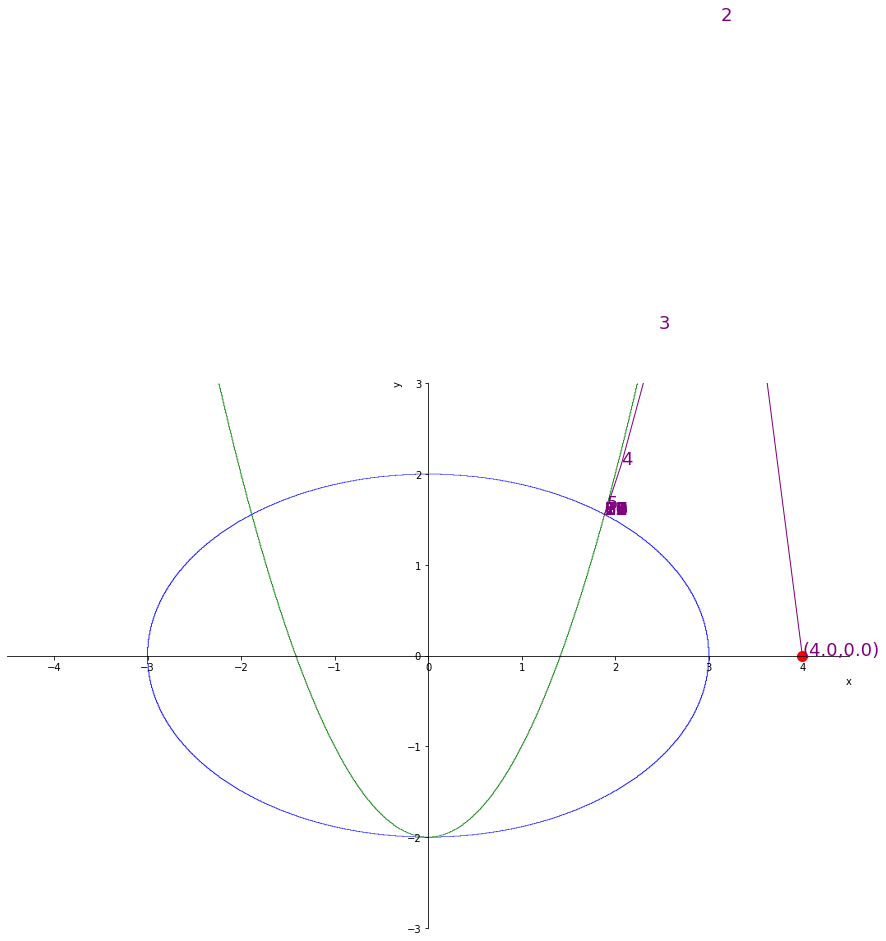

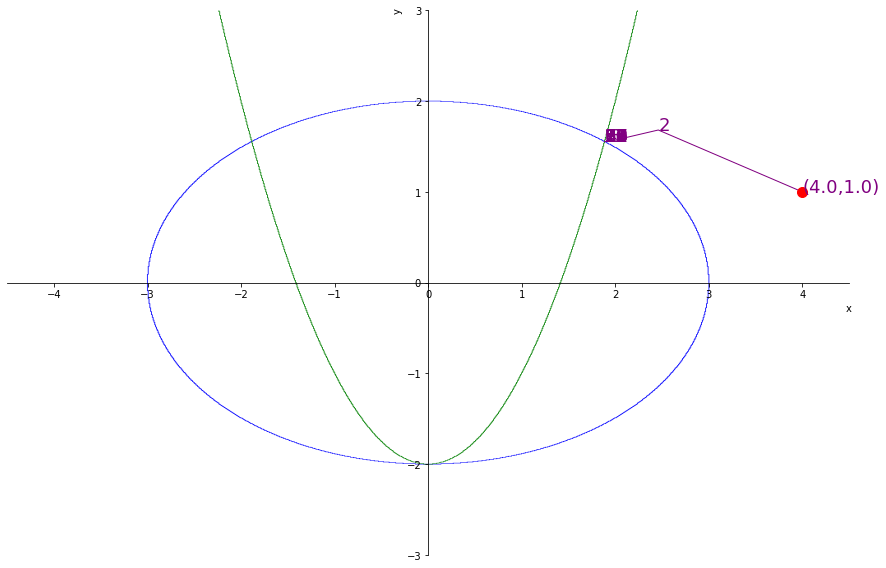

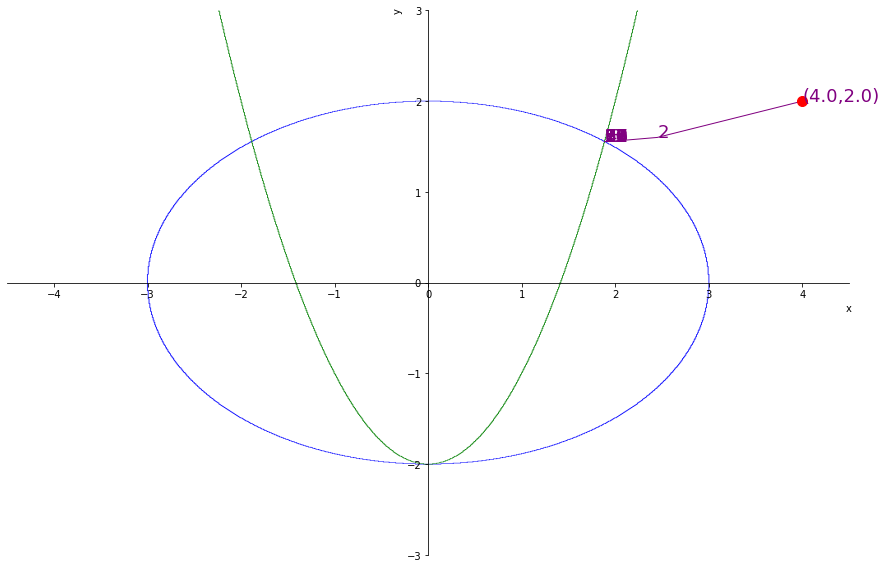

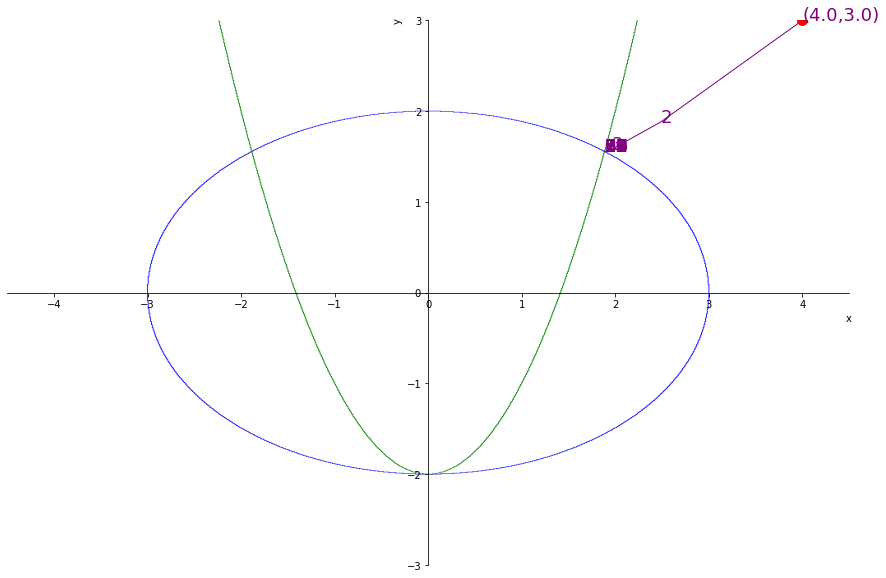

In [40]:
# 繪製動畫
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ast import literal_eval
import random
import time
from math import *

plt.rcParams['figure.figsize'] = 12,8 # 更改圖片大小

def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]

def draw_gif(ps):
    x, y = symbols('x y')
    rangex=(x,-4.5, 4.5)
    rangey=(y,-3, 3)
    # f:(x**2)/9+(y**2)/4 = 1
    f=Eq(x**2/9 + y**2/4,1)
    p1=plot_implicit(f,rangex,rangey,show=False)
    # g:x**2-y = 2
    g=Eq(x**2-y, 2)
    p2=plot_implicit(g,rangex,rangey,show=False)

    # set line color
    p1[0].line_color = 'b'
    p2[0].line_color = 'g'

    p1.extend(p2)

    # 繪製圖形:標誌座標和編號
    fig, axe = get_sympy_subplots(p1)
    if(len(ps[0])==1):axe.text(ps[0][0],ps[1][0],'div',color='purple',fontsize=18)
    else:
        for i in range(len(ps[0])):
            if(i>0):
                axe.text(ps[0][i],ps[1][i],i+1,color='purple',fontsize=18)
            else:
                axe.text(ps[0][i],ps[1][i],'('+str(ps[0][i])+','+str(ps[1][i])+')',color='purple',fontsize=18)
    # 繪製圖形及動畫
    line, = axe.plot(ps[0], ps[1], color='purple', linestyle='-', linewidth=1)
    dot, = axe.plot([], [], color='red', marker='o', markersize=10, linestyle='')
    def update(i):
        dot.set_data(ps[0][i], ps[1][i])
        return dot,

    def init():
        dot.set_data(ps[0][0], ps[1][0])
        return dot,
    ani = animation.FuncAnimation(fig=fig, func=update, frames=len(ps[0]), init_func=init, interval=10, blit=True, repeat=True)
    plt.show()
    ani.save('MovingPoints/MovingPoint'+str(ps[0][0])+'_'+str(ps[1][0])+'.gif', writer='pillow', fps=1/0.3)
for pt in points:
    draw_gif(pt)

Text(0, -2.5, '3')

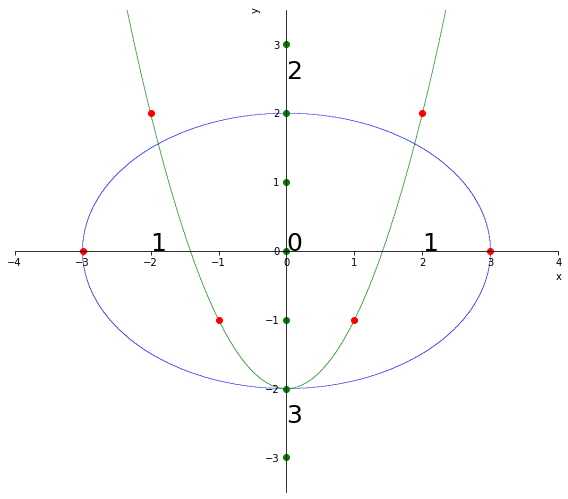

In [50]:
# 標示每個區域編號的圖
# 繪製圖形
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
from ast import literal_eval
import random

plt.rcParams['figure.figsize'] = 8,7 # 更改圖片大小

def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]


x, y = symbols('x y')
rangex=(x,-4, 4)
rangey=(y,-3.5, 3.5)
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,rangex,rangey,show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,rangex,rangey,show=False)

# set line color
p1[0].line_color = 'b'
p2[0].line_color = 'g'

p1.extend(p2)

fig, axe = get_sympy_subplots(p1)
#plt.plot([-1,-1,1,1],[0,1,0,1],'o',color='yellow')
#plt.plot([-2,-2,-2,2,2,2],[-1,0,1,-1,0,1],'o',color='blue')
#plt.plot([-2,-1,-1,1,1,2],[3,2,3,2,3,3],'o',color='purple')
plt.plot([-3,-2,-1,1,2,3],[0,2,-1,-1,2,0],'o',color='red')
plt.plot([0,0,0,0,0,0,0],[-3,-2,-1,0,1,2,3],'o',color='green')
axe.text(0,0,0,fontsize=25)
axe.text(2,0,1,fontsize=25)
axe.text(-2,0,1,fontsize=25)
axe.text(0,2.5,2,fontsize=25)
axe.text(0,-2.5,3,fontsize=25)

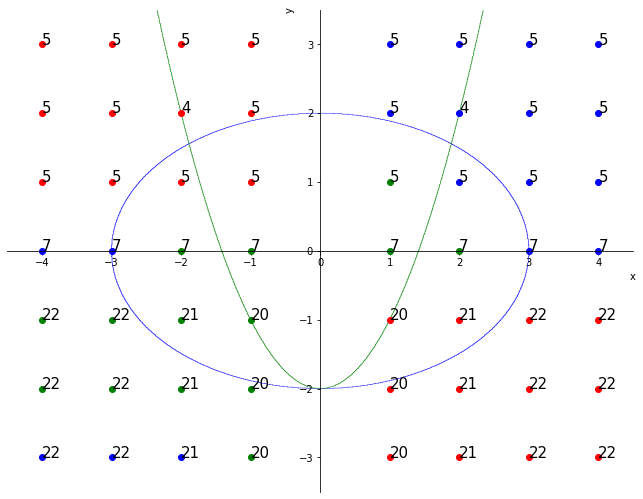

In [89]:
# condition number
# 繪製圖形
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
from ast import literal_eval
import random
import re

plt.rcParams['figure.figsize'] = 9,7 # 更改圖片大小

def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]


x, y = symbols('x y')
rangex=(x,-4.5, 4.5)
rangey=(y,-3.5, 3.5)
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,rangex,rangey,show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,rangex,rangey,show=False)

# set line color
p1[0].line_color = 'b'
p2[0].line_color = 'g'

p1.extend(p2)

# 讀取檔案點資訊
cpts_s=[[],[]]
it_s=[]
cpts_b=[[],[]]
it_b=[]
cpts_n=[[],[]]
it_n=[]
ps=[[],[]]

file_small=open('c_small.txt', mode='r')
words=file_small.readlines()
for w in words:
    str1=w.split(' ')
    cpts_s[0].append(literal_eval(str1[0]))
    cpts_s[1].append(literal_eval(str1[1]))
    it_s.append(str1[2])
file_small.close()
file_big=open('c_big.txt', mode='r')
words=file_big.readlines()
for w in words:
    str1=w.split(' ')
    cpts_b[0].append(literal_eval(str1[0]))
    cpts_b[1].append(literal_eval(str1[1]))
    it_b.append(str1[2])
file_big.close()

file_nan=open('c_nan.txt', mode='r')
words=file_nan.readlines()
for w in words:
    str1=w.split(' ')
    cpts_n[0].append(literal_eval(str1[0]))
    cpts_n[1].append(literal_eval(str1[1]))
    it_n.append(str1[2])
file_nan.close()

ps=[[],[]]
while ps in cpts_s:
    cpts_s.remove(ps)
while ps in cpts_b:
    cpts_b.remove(ps)
while ps in cpts_n:
    cpts_n.remove(ps)

# 繪製圖形:標誌座標和編號
fig, axe = get_sympy_subplots(p1)
for i in range(len(cpts_s[0])):
    axe.plot(cpts_s[0][i],cpts_s[1][i],"o",color='blue')
    axe.text(cpts_s[0][i],cpts_s[1][i],it_s[i],fontsize=15)
for i in range(len(cpts_b[0])):
    axe.plot(cpts_b[0][i],cpts_b[1][i],"o",color='green')
    axe.text(cpts_b[0][i],cpts_b[1][i],it_b[i],fontsize=15)
for i in range(len(cpts_n[0])):
    axe.plot(cpts_n[0][i],cpts_n[1][i],"o",color='red')
    axe.text(cpts_n[0][i],cpts_n[1][i],it_n[i],fontsize=15)

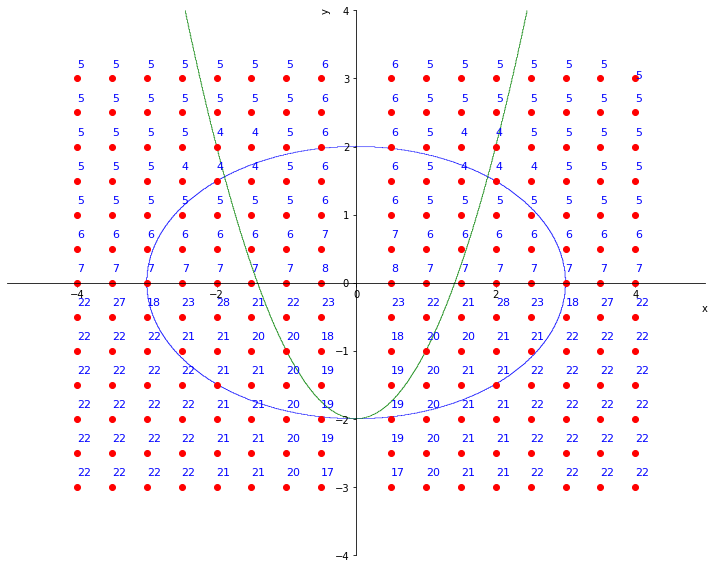

In [95]:
# all points
# 繪製圖形
from sympy import *
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
from ast import literal_eval
import random
import re

plt.rcParams['figure.figsize'] = 10,8 # 更改圖片大小

def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]


x, y = symbols('x y')
rangex=(x,-5, 5)
rangey=(y,-4, 4)
# f:(x**2)/9+(y**2)/4 = 1
f=Eq(x**2/9 + y**2/4,1)
p1=plot_implicit(f,rangex,rangey,show=False)
# g:x**2-y = 2
g=Eq(x**2-y, 2)
p2=plot_implicit(g,rangex,rangey,show=False)

# set line color
p1[0].line_color = 'b'
p2[0].line_color = 'g'

p1.extend(p2)

# 讀取檔案點資訊
pts=[[],[]]
it=[]
file_small=open('points_total.txt', mode='r')
words=file_small.readlines()
for w in words:
    str1=w.split(' ')
    pts[0].append(literal_eval(str1[0]))
    pts[1].append(literal_eval(str1[1]))
    it.append(str1[2])
file_small.close()
ps=[[],[]]
while ps in pts:
    pts.remove(ps)

# 繪製圖形:標誌座標和編號
fig, axe = get_sympy_subplots(p1)
for i in range(len(pts[0])):
    axe.plot(pts[0][i],pts[1][i],"o",color='red')
    axe.text(pts[0][i],pts[1][i],it[i],fontsize=11,color='blue')